<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/ecc_lsb_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elliptic Curve Criptography

with library that use schema of ECDH + AES
1. Elliptic Curve Diffle Hellman for key exchange
2. AES to encrypt & decrypt the massage/plaintext

In [175]:
!pip install eciespy

In [176]:
CONTENT = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup"

In [177]:
from ecies.utils import generate_eth_key
from ecies import encrypt, decrypt

private_key = generate_eth_key()
public_key = private_key.public_key

public_key_hex = public_key.to_hex()
private_key_hex = private_key.to_hex()

print("Public Key:", public_key_hex)
print("Private Key:", private_key_hex)

ciphertext = encrypt(public_key_hex, CONTENT.encode())

print("Ciphertext:", ciphertext.hex())

decrypted_message = decrypt(private_key_hex, ciphertext)
print("Decrypted Message:", decrypted_message.decode())

Public Key: 0xf6974bfebb88870babeb175c34ae55023821f4ca8e010895e261c64543c04dc02e6dbc48f5f3a79a56280f2d67abe113a219237e23b1256a3c38b5d3488d465b
Private Key: 0x695d1c3cfa970ea34646ad1e73f4e4555f27a66c08462747e146b2658ab2edb3
Ciphertext: 04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115
Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


# Koblitz Method & Elliptic Curve El Gamal

## Koblitz Method

to encode & decode integer to coordinate point on cartesius

In [178]:
# Parameters
p = 751  # prime modulus
k = 20    # chosen small integer
a = -1    # coefficient of x in the elliptic curve
b = 188    # constant in the elliptic curve

### Char to Num & Num to Char

In [179]:
# Manually create dictionaries for char-to-num and num-to-char mappings
char_to_num_dict = {
    '0': 10, '1': 11,
    'a': 12, 'b': 13, 'c': 14, 'd': 15, 'e': 16, 'f': 17, 'g': 18, 'h': 19,
    'i': 20, 'j': 21, 'k': 22, 'l': 23, 'm': 24, 'n': 25, 'o': 26, 'p': 27,
    'q': 28, 'r': 29, 's': 30, 't': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35
}

# Reverse dictionary for num-to-char mapping
num_to_char_dict = {v: k for k, v in char_to_num_dict.items()}

# Function to map char to num
def char_to_num(char):
    if char in char_to_num_dict:
        return char_to_num_dict[char]
    else:
        raise ValueError(f"Character '{char}' is not valid. Please use '0-1' or 'a-x'.")

# Function to map num to char
def num_to_char(num):
    if num in num_to_char_dict:
        return num_to_char_dict[num]
    else:
        raise ValueError(f"Number '{num}' is not valid. Please use numbers in the range 10-35.")

def message_to_koblitz(message):
    # Convert the message to a list of characters
    chars = list(message)

    koblitz = []
    for char in chars:
        num = char_to_num(char)
        koblitz.append(num)

    return koblitz

def koblitz_to_message(koblitz):
    message = []
    for num in koblitz:
        char = num_to_char(num)
        message.append(char)

    return ''.join(message)

# Test mapping from char to num
chars = '01ax'

koblitz_message = message_to_koblitz(chars)
print("Koblitz Message:", koblitz_message)

message = koblitz_to_message(koblitz_message)
print("Message:", message)

Koblitz Message: [10, 11, 12, 35]
Message: 01ax


### Koblitz Encoding

In [180]:
import sympy as sp

# Elliptic curve equation: y^2 = x^3 + ax + b mod p
def koblitz_encode(m, max_attempts=1000):
    num = 1  # Start with x = m * k + 1
    attempts = 0

    while attempts < max_attempts:
        x = m * k + num
        rhs = (x**3 + a * x + b) % p  # right-hand side of the elliptic curve equation

        # Check if rhs is a quadratic residue modulo p
        if sp.is_quad_residue(rhs, p):
            y = sp.sqrt_mod(rhs, p)
            return (x, y)  # Return the point (x, y) as a tuple

        num += 1  # Increment to check next x value
        attempts += 1

    # If no valid point is found after max_attempts
    raise ValueError(f"No valid point found after {max_attempts} attempts for message {m}.")

def koblitz_encode_message(message):
  encoded_points = []
  for char in message:
    encoded_point = koblitz_encode(char)
    encoded_points.append(encoded_point)
    print(f"Encoded point for character '{char}': {encoded_point}")

  return encoded_points

encoded_points = koblitz_encode_message(koblitz_message)
encoded_points

Encoded point for character '10': (201, 5)
Encoded point for character '11': (224, 248)
Encoded point for character '12': (241, 230)
Encoded point for character '35': (701, 203)


[(201, 5), (224, 248), (241, 230), (701, 203)]

### Koblitz Decoding

In [181]:
# Decoding: m = (x - 1) / k
def koblitz_decode(x):
    return (x - 1) // k

def koblitz_decode_message(points):
    decoded_message = []
    for point in points:
        decoded_num = koblitz_decode(point[0])  # Decode the x-coordinate
        decoded_message.append(decoded_num)
        print(f"Decoded character for point {point}: {decoded_num}")
    return decoded_message

# Output the result
decoded_points = koblitz_decode_message(encoded_points)
decoded_points

Decoded character for point (201, 5): 10
Decoded character for point (224, 248): 11
Decoded character for point (241, 230): 12
Decoded character for point (701, 203): 35


[10, 11, 12, 35]

In [182]:
message = koblitz_to_message(decoded_points)
message

'01ax'

## Elliptic Curve El Gamal

Elliptic Curve with El Gamal

In [183]:
# Parameters
p = 11  # prime modulus
# k = 20    # chosen small integer
a = 1    # coefficient of x in the elliptic curve
b = 6    # constant in the elliptic curve
# B = (2, 4)

In [184]:
# Parameters
p = 751  # prime modulus
a = -1    # coefficient of x in the elliptic curve
b = 188    # constant in the elliptic curve

In [185]:
import random
import sympy as sp
import json
import base64

class EllipticCurveElGamal:
  def __init__(self, a, b, p, k, B=None):
    self.p = p # primer number
    self.a = a # alpha
    self.b = b # beta

    self.k = k
    self.PointB = B

    self.pointP = None
    self.pointQ = None

    self.char_to_num_dict = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17,
    'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25,
    'q': 26, 'r': 27, 's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32, 'x': 33,
    'y': 34, 'z': 35, '.': 36, '#': 37, '*': 38, '/': 39, '-': 40
    }

    self.num_to_char_dict = {v: k for k, v in self.char_to_num_dict.items()}

    self.k_koblitz = max(self.char_to_num_dict.values()) + 1  # max 24 for 35 char

  def example_function(self):
      print(f"Using persistent k value: {self.k}")

  def elliptic_curve_equation(self, x):
    return (x**3 + self.a*x + self.b) % self.p

  def is_on_curve(self, x, y):
    return self.elliptic_curve_equation(x)  == (y**2) % p

  # def generate_random_number(self):
  #   self.k = random.randint(1, self.p - 1)
  #   return self.k

  def generate_random_point(self):
    while True:
      x = random.randint(1, self.p - 1)
      y = random.randint(1, self.p - 1)
      if self.is_on_curve(x, y):
        return (x, y)

  def mod_inverse(self, a, p):
      if a == 0:
          raise ValueError("Inverse does not exist for 0.")
      return pow(a, p - 2, p)

  def calculate_slope_mod(self, P, Q):
    x1, y1 = P
    x2, y2 = Q
    if x1 == x2 and y1 == y2:
        # Use the formula for point doubling when P == Q
        numerator = (3 * x1**2 + self.a) % self.p
        denominator = (2 * y1) % self.p
    else:
        # Use the formula for regular slope when P != Q
        numerator = (y2 - y1) % self.p
        denominator = (x2 - x1) % self.p

    if denominator == 0:
        raise ValueError("Slope is undefined (denominator is zero).")

    # Compute the slope as (numerator / denominator) % p, which is
    # numerator * mod_inverse(denominator, p) % p
    slope = (numerator * self.mod_inverse(denominator, self.p)) % self.p
    return slope

  def calculate_add_xr_mod(self, P, Q, m):
    x1, y1 = P
    x2, y2 = Q
    xr = (m**2 - x1 - x2) % self.p
    return xr

  def calculate_add_yr_mod(self, P, Q, m, xr):
    x1, y1 = P
    x2, y2 = Q
    yr = (m * (x1 - xr) - y1) % self.p
    return yr

  def calculate_point_addition(self, P, Q):
    m = self.calculate_slope_mod(P, Q)

    xr = self.calculate_add_xr_mod(P, Q, m)

    yr = self.calculate_add_yr_mod(P, Q, m, xr)

    R = (xr, yr)

    return R

  def calculate_dob_xr_mod(self, P, Q, m):
    x1, y1 = P
    x2, y2 = Q
    xr = (m**2 - (2 * x1)) % self.p
    return xr

  def calculate_dob_yr_mod(self, P, Q, m, xr):
    x1, y1 = P
    yr = (m * (x1 - xr) - y1) % self.p
    return yr

  def calculate_point_doubling(self, P):

    m = self.calculate_slope_mod(P, P)

    xr = self.calculate_dob_xr_mod(P, P, m)

    yr = self.calculate_dob_yr_mod(P, P, m, xr)

    R = (xr, yr)

    return R

  def calculate_point_multiplication(self, P, k):
    if k == 0:
      return None
    elif k == 1:
      return P

    # Initialize R to be the point at infinity, often represented as None in this context
    R = None
    Q = P  # Start with Q as P

    # Double-and-add method
    while k > 0:
        if k % 2 == 1:  # If k is odd, add Q to the result
            if R is None:
                R = Q  # R is the point at infinity initially
            else:
                R = self.calculate_point_addition(R, Q)
        Q = self.calculate_point_addition(Q, Q)  # Double the point Q
        k //= 2  # Move to the next bit

    return R

  def calculate_point_subtract(self, P, Q):
    # Find the inverse of point Q (x_Q, y_Q) -> (x_Q, -y_Q mod p)
    Q_inv = (Q[0], (-Q[1]) % self.p)

    # Subtract P - Q by adding P and Q_inv
    R = self.calculate_point_addition(P, Q_inv)

    return R

  def generate_public_key(self, B, private_key):
    public_key = self.calculate_point_multiplication(B, private_key)
    return public_key

  def enryption(self, M, public_key):
    # k = random.randint(1, self.p - 1) # 1 < k < p - 1

    C1 = self.calculate_point_multiplication(self.PointB, self.k)
    C2 = self.calculate_point_addition(M, self.calculate_point_multiplication(public_key, self.k))

    return (C1, C2)

  def decryption(self, C, private_key):
    C1, C2 = C

    _p = self.calculate_point_multiplication(C1, private_key)

    plain = self.calculate_point_subtract(C2, _p)

    return plain

  # Function to map char to num
  def char_to_num(self, char):
      # Ensure the input is a string; if not, convert it
      char = str(char)

      # Check if the string exists in the dictionary
      if char in self.char_to_num_dict:
          return self.char_to_num_dict[char]
      else:
          # Handle the expanded character set (0-40)
          raise ValueError(f"Character '{char}' is not valid. Please use '0-9', 'a-z', or other valid characters.")


  # Function to map num to char
  def num_to_char(self, num):
      # Ensure that the input is an integer; if it's a string digit, convert to integer
      if isinstance(num, str) and num.isdigit():
          num = int(num)

      # Now we expect num to be an integer
      if isinstance(num, int):
          if num in self.num_to_char_dict:  # Handle numbers 0-40 by converting them using the dictionary
              return self.num_to_char_dict[num]
          else:
              raise ValueError(f"Number '{num}' is out of the valid range (0-40).")
      else:
          raise ValueError(f"Input '{num}' is not valid. Please provide a valid number.")


  def message_to_koblitz(self, message):
      # Convert the message to a list of characters
      chars = list(message)

      koblitz = []
      for char in chars:
          num = self.char_to_num(char)
          koblitz.append(num)

      return koblitz

  def koblitz_to_message(self, koblitz):
      message = []
      for num in koblitz:
          char = self.num_to_char(num)
          message.append(char)

      return ''.join(message)

  def koblitz_encode(self, m, max_attempts=1000):
    num = 1  # Start with x = m * k + 1
    attempts = 0

    while attempts < max_attempts:
        x = m * self.k_koblitz + num
        rhs = (x**3 + self.a * x + self.b) % self.p  # right-hand side of the elliptic curve equation

        # Check if rhs is a quadratic residue modulo p
        if sp.is_quad_residue(rhs, self.p):
            y = sp.sqrt_mod(rhs, self.p)
            return (x, y)  # Return the point (x, y) as a tuple

        num += 1  # Increment to check next x value
        attempts += 1

    # If no valid point is found after max_attempts
    raise ValueError(f"No valid point found after {max_attempts} attempts for message {m}.")

  def koblitz_encode_message(self, message):
    encoded_points = []
    for char in message:
      encoded_point = self.koblitz_encode(char)
      encoded_points.append(encoded_point)
      # print(f"Encoded point for character '{char}': {encoded_point}")

    return encoded_points

  def koblitz_decode(self, x):
    return (x - 1) // self.k_koblitz

  def koblitz_decode_message(self, points):
      decoded_message = []
      for point in points:
          decoded_num = self.koblitz_decode(point[0])  # Decode the x-coordinate
          decoded_message.append(decoded_num)
          # print(f"Decoded character for point {point}: {decoded_num}")
      return decoded_message

  def encrypt_message(self, message, public_key):
      # Encode the message into Koblitz points
      koblitz_message = self.message_to_koblitz(message)
      encoded_message = self.koblitz_encode_message(koblitz_message)
      encrypted_points = []

      # Encrypt each Koblitz point
      for point in encoded_message:
          encrypted_point = self.enryption(point, public_key)
          encrypted_points.append(encrypted_point)

      # Convert encrypted_points (a list of tuples) to a JSON string
      encrypted_message_string = json.dumps(encrypted_points)

      # Optionally, encode the string to base64 for a cleaner ciphertext
      encrypted_message_base64 = base64.b64encode(encrypted_message_string.encode()).decode()

      return encrypted_message_base64, encrypted_points  # Return as readable string

  def decrypt_message(self, encrypted_message_base64, private_key):
      # Decode the base64 string back to the JSON string
      encrypted_message_string = base64.b64decode(encrypted_message_base64).decode()

      # Convert the JSON string back to a list of encrypted points (tuples)
      encrypted_points = json.loads(encrypted_message_string)

      decrypted_message = []

      # Decrypt each point
      for point in encrypted_points:
          decrypted_point = self.decryption(point, private_key)
          decrypted_message.append(decrypted_point)

      # Decode the Koblitz points into the original numeric values
      decoded_koblitz_points = self.koblitz_decode_message(decrypted_message)

      # Convert numeric Koblitz points to characters using num_to_char
      plain_text_message = ''.join([self.num_to_char(num) for num in decoded_koblitz_points])

      return plain_text_message

In [186]:
random_num = random.randint(1, p - 1)
print(f'random number: {random_num}')

elliptic1 = EllipticCurveElGamal(a, b, p, random_num)

# k = elliptic1.generate_random_number()
# print(f'k: {k}')

basis = elliptic1.generate_random_point()
print(f'basis: {basis}')

elliptic1.PointB = basis

print(f'is basis on curve: {elliptic1.is_on_curve(basis[0], basis[1])}')

random number: 554
basis: (402, 722)
is basis on curve: True


In [187]:
private_key = random.randint(1, p - 1)
public_key = elliptic1.generate_public_key(basis, private_key)

print(f'private key: {private_key}')
print(f'public key: {public_key}')

private key: 367
public key: (231, 575)


In [188]:
message = (385, 423)

cipher = elliptic1.enryption(message, public_key)

decrypted_message = elliptic1.decryption(cipher, private_key)

print(f'message: {message}')
print(f'cipher: {cipher}')
print(f'decrypted message: {decrypted_message}')

message: (385, 423)
cipher: ((578, 99), (131, 34))
decrypted message: (385, 423)


In [189]:
CONTENT = "3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup"

In [190]:
elliptic1.k_koblitz = 18 # max 18 if add "-#./*"

# plaintexts = "-#./*"
plaintexts = "lorem.#-/*"
# plaintexts = CONTENT
print(f'Plaintext: {plaintexts}')

ciphertexts, points_cipher = elliptic1.encrypt_message(plaintexts, public_key)
print(f'Ciphertext: {ciphertexts}')

decrypted_message = elliptic1.decrypt_message(ciphertexts, private_key)
print(f'Decryptedtext: {decrypted_message}')

Plaintext: lorem.#-/*
Ciphertext: W1tbNTc4LCA5OV0sIFs0MDEsIDE1M11dLCBbWzU3OCwgOTldLCBbNDg4LCA1OV1dLCBbWzU3OCwgOTldLCBbNjQsIDczOF1dLCBbWzU3OCwgOTldLCBbMzMzLCA0MzVdXSwgW1s1NzgsIDk5XSwgWzQ4NSwgMTNdXSwgW1s1NzgsIDk5XSwgWzM4NywgNjkyXV0sIFtbNTc4LCA5OV0sIFs0OTYsIDk3XV0sIFtbNTc4LCA5OV0sIFs3NDAsIDM4OV1dLCBbWzU3OCwgOTldLCBbNjE3LCAxNDldXSwgW1s1NzgsIDk5XSwgWzUyOSwgNDk3XV1d
Decryptedtext: lorem.#-/*


In [191]:
len(ciphertexts)

328

In [192]:
points_cipher

[((578, 99), (401, 153)),
 ((578, 99), (488, 59)),
 ((578, 99), (64, 738)),
 ((578, 99), (333, 435)),
 ((578, 99), (485, 13)),
 ((578, 99), (387, 692)),
 ((578, 99), (496, 97)),
 ((578, 99), (740, 389)),
 ((578, 99), (617, 149)),
 ((578, 99), (529, 497))]

In [193]:
points_cipher

[((578, 99), (401, 153)),
 ((578, 99), (488, 59)),
 ((578, 99), (64, 738)),
 ((578, 99), (333, 435)),
 ((578, 99), (485, 13)),
 ((578, 99), (387, 692)),
 ((578, 99), (496, 97)),
 ((578, 99), (740, 389)),
 ((578, 99), (617, 149)),
 ((578, 99), (529, 497))]

In [194]:
decrypted_message == CONTENT

False

In [195]:
len(ciphertexts)

328

# Least Significant Bit

In [196]:
!git clone https://github.com/RobinDavid/LSB-Steganography && cd LSB-Steganography && ls && pip install -r requirements.txt

fatal: destination path 'LSB-Steganography' already exists and is not an empty directory.


In [374]:
#!/usr/bin/env python
# coding:UTF-8
"""LSBSteg.py

Usage:
  LSBSteg.py encode -i <input> -o <output> -f <file>
  LSBSteg.py decode -i <input> -o <output>

Options:
  -h, --help                Show this help
  --version                 Show the version
  -f,--file=<file>          File to hide
  -i,--in=<input>           Input image (carrier)
  -o,--out=<output>         Output image (or extracted file)
"""

import cv2
import docopt
import numpy as np


class SteganographyException(Exception):
    pass


class LSBSteg():
    def __init__(self, im):
        self.image = im
        self.height, self.width, self.nbchannels = im.shape
        self.size = self.width * self.height

        self.maskONEValues = [1,2,4,8,16,32,64,128]
        #Mask used to put one ex:1->00000001, 2->00000010 .. associated with OR bitwise
        self.maskONE = self.maskONEValues.pop(0) #Will be used to do bitwise operations

        self.maskZEROValues = [254,253,251,247,239,223,191,127]
        #Mak used to put zero ex:254->11111110, 253->11111101 .. associated with AND bitwise
        self.maskZERO = self.maskZEROValues.pop(0)

        self.curwidth = 0  # Current width position
        self.curheight = 0 # Current height position
        self.curchan = 0   # Current channel position

    def put_binary_value(self, bits): #Put the bits in the image
        for c in bits:
            val = list(self.image[self.curheight,self.curwidth]) #Get the pixel value as a list
            if int(c) == 1:
                val[self.curchan] = int(val[self.curchan]) | self.maskONE #OR with maskONE
            else:
                val[self.curchan] = int(val[self.curchan]) & self.maskZERO #AND with maskZERO

            self.image[self.curheight,self.curwidth] = tuple(val)
            self.next_slot() #Move "cursor" to the next space

    def next_slot(self):#Move to the next slot were information can be taken or put
        if self.curchan == self.nbchannels-1: #Next Space is the following channel
            self.curchan = 0
            if self.curwidth == self.width-1: #Or the first channel of the next pixel of the same line
                self.curwidth = 0
                if self.curheight == self.height-1:#Or the first channel of the first pixel of the next line
                    self.curheight = 0
                    if self.maskONE == 128: #Mask 1000000, so the last mask
                        raise SteganographyException("No available slot remaining (image filled)")
                    else: #Or instead of using the first bit start using the second and so on..
                        self.maskONE = self.maskONEValues.pop(0)
                        self.maskZERO = self.maskZEROValues.pop(0)
                else:
                    self.curheight +=1
            else:
                self.curwidth +=1
        else:
            self.curchan +=1

    def read_bit(self): #Read a single bit int the image
        val = self.image[self.curheight,self.curwidth][self.curchan]
        val = int(val) & self.maskONE
        self.next_slot()
        if val > 0:
            return "1"
        else:
            return "0"

    def read_byte(self):
        return self.read_bits(8)

    def read_bits(self, nb): #Read the given number of bits
        bits = ""
        for i in range(nb):
            bits += self.read_bit()
        return bits

    def byteValue(self, val):
        return self.binary_value(val, 8)

    def binary_value(self, val, bitsize): #Return the binary value of an int as a byte
        binval = bin(val)[2:]
        if len(binval) > bitsize:
            raise SteganographyException(f"binary value larger than the expected size {len(binval)} > {bitsize}")
        while len(binval) < bitsize:
            binval = "0"+binval
        return binval

    def encode_text(self, txt):
        l = len(txt)
        binl = self.binary_value(l, 16) #Length coded on 2 bytes so the text size can be up to 65536 bytes long
        self.put_binary_value(binl) #Put text length coded on 4 bytes
        for char in txt: #And put all the chars
            c = ord(char)
            self.put_binary_value(self.byteValue(c))
        return self.image

    def decode_text(self):
        ls = self.read_bits(16) #Read the text size in bytes
        l = int(ls,2)
        i = 0
        unhideTxt = ""
        while i < l: #Read all bytes of the text
            tmp = self.read_byte() #So one byte
            i += 1
            unhideTxt += chr(int(tmp,2)) #Every chars concatenated to str
        return unhideTxt

    def encode_image(self, imtohide):
        w = imtohide.width
        h = imtohide.height
        if self.width*self.height*self.nbchannels < w*h*imtohide.channels:
            raise SteganographyException("Carrier image not big enough to hold all the datas to steganography")
        binw = self.binary_value(w, 16) #Width coded on to byte so width up to 65536
        binh = self.binary_value(h, 16)
        self.put_binary_value(binw) #Put width
        self.put_binary_value(binh) #Put height
        for h in range(imtohide.height): #Iterate the hole image to put every pixel values
            for w in range(imtohide.width):
                for chan in range(imtohide.channels):
                    val = imtohide[h,w][chan]
                    self.put_binary_value(self.byteValue(int(val)))
        return self.image


    def decode_image(self):
        width = int(self.read_bits(16),2) #Read 16bits and convert it in int
        height = int(self.read_bits(16),2)
        unhideimg = np.zeros((width,height, 3), np.uint8) #Create an image in which we will put all the pixels read
        for h in range(height):
            for w in range(width):
                for chan in range(unhideimg.channels):
                    val = list(unhideimg[h,w])
                    val[chan] = int(self.read_byte(),2) #Read the value
                    unhideimg[h,w] = tuple(val)
        return unhideimg

    def encode_binary(self, data):
        l = len(data)
        if self.width*self.height*self.nbchannels < l+64:
            raise SteganographyException("Carrier image not big enough to hold all the datas to steganography")
        self.put_binary_value(self.binary_value(l, 64))
        for byte in data:
            byte = byte if isinstance(byte, int) else ord(byte) # Compat py2/py3
            self.put_binary_value(self.byteValue(byte))
        return self.image

    def decode_binary(self):
        l = int(self.read_bits(64), 2)
        output = b""
        for i in range(l):
            output += bytearray([int(self.read_byte(),2)])
        return output


def main():
    args = docopt.docopt(__doc__, version="0.2")
    in_f = args["--in"]
    out_f = args["--out"]
    in_img = cv2.imread(in_f)
    steg = LSBSteg(in_img)
    lossy_formats = ["jpeg", "jpg"]

    if args['encode']:
        #Handling lossy format
        out_f, out_ext = out_f.split(".")
        if out_ext in lossy_formats:
            out_f = out_f + ".png"
            print("Output file changed to ", out_f)

        data = open(args["--file"], "rb").read()
        res = steg.encode_binary(data)
        cv2.imwrite(out_f, res)

    elif args["decode"]:
        raw = steg.decode_binary()
        with open(out_f, "wb") as f:
            f.write(raw)

# if __name__=="__main__":
#     main()

# Lampel Ziv Welch

In [198]:
!git clone https://github.com/joeatwork/python-lzw

fatal: destination path 'python-lzw' already exists and is not an empty directory.


In [199]:
!cd /content/python-lzw && mv lzw/ /content/ && python setup.py install

mv: cannot stat 'lzw/': No such file or directory


In [200]:
import lzw

# Example text to compress (can be any string)
original_text = CONTENT

# Convert the original text into bytes (UTF-8 encoding)
original_bytes = original_text.encode('utf-8')

# Part 1: Compression (in-memory)
compressed = lzw.compress(original_bytes)

# Convert compressed generator to a list to see its contents
compressed_list = list(compressed)

# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(compressed_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

# Print each variable
print("Original Text (String):", original_text)
print("Original Bytes:", original_bytes)
print("Compressed List (Byte Chunks):", compressed_list)
print("Decompressed Bytes:", decompressed_bytes)
print("Decompressed Text (String):", decompressed_text)

# Part 3: Print sizes and results for comparison
original_size = len(original_bytes)
compressed_size = len(b"".join(compressed_list))  # Join to get compressed byte size
decompressed_size = len(decompressed_bytes)

# Print the sizes in bytes
print(f"\nOriginal size: {original_size} bytes")
print(f"Compressed size: {compressed_size} bytes")
print(f"Decompressed size: {decompressed_size} bytes")

# Check if decompression was successful
if decompressed_text == original_text:
    print("Decompression was successful!")
else:
    print("Decompression failed.")

Original Text (String): 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup
Original Bytes: b'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup'
Compressed List (Byte Chunks): [b'\x19', b'\x8c', b'\xc6', b'\x83', b'\x81', b'\xb0', b'\xc4', b'`', b'4', b'\x18', b'\x0c', b'G', b'#', b'q', b'\x84', b'8', b'j', b'#', b'1', b'\x9a', b'\x0e', b'F', b'\x93', b'\x99', b'\xd0', b'\xde', b'f', b'2', b'\x9c', b'\x85', b'F', b'H', b'\xd1', b'\xa4', b'\xc2', b'n', b'\x15', b'\x18', b'\x8e', b'\xa6', b'H', b'\xf9', b'\xba', b'.', b'#', b':', b'\x19', b'L', b'\xe6', b'\x13', b'`', b'\x8e', b'\x17', b'\x0c', b'\x16', b'\x8c', b'\x06', b's', b'!', b'\xa0', b'\x8c', b'\xd8', b'a', b'5', b'\x9a', b'E', b'\xb3', b'\x89', b'\xd0', b'\x8c', b'\xc4', b'#', b'

# Huffman Encoding

In [201]:
import heapq
from collections import Counter

# Class for Huffman Tree Nodes
class HuffmanNode:
    def __init__(self, char=None, freq=0, left=None, right=None):
        self.char = char
        self.freq = freq
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq

# Function to build the Huffman Tree
def build_huffman_tree(frequency):
    heap = [HuffmanNode(char, freq) for char, freq in frequency.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        node1 = heapq.heappop(heap)
        node2 = heapq.heappop(heap)
        merged = HuffmanNode(freq=node1.freq + node2.freq, left=node1, right=node2)
        heapq.heappush(heap, merged)

    return heap[0]  # Return the root of the tree

# Function to generate Huffman codes from the Huffman Tree
def generate_huffman_codes(node, current_code="", huffman_codes={}):
    if node is None:
        return

    if node.char is not None:
        huffman_codes[node.char] = current_code

    generate_huffman_codes(node.left, current_code + "0", huffman_codes)
    generate_huffman_codes(node.right, current_code + "1", huffman_codes)

    return huffman_codes

# Function to compress the data using Huffman Encoding
def huffman_compress(data):
    # Count the frequency of each byte
    frequency = Counter(data)

    # Build Huffman Tree
    huffman_tree = build_huffman_tree(frequency)

    # Generate Huffman Codes
    huffman_codes = generate_huffman_codes(huffman_tree)

    # Encode data into its binary representation
    encoded_data = "".join(huffman_codes[byte] for byte in data)

    # Pad the encoded data to make its length a multiple of 8
    padding = 8 - len(encoded_data) % 8
    encoded_data += "0" * padding
    padding_info = "{0:08b}".format(padding)

    # Convert binary data to bytes
    compressed_data = bytearray()
    compressed_data.append(int(padding_info, 2))  # First byte stores the padding information
    for i in range(0, len(encoded_data), 8):
        byte = encoded_data[i:i+8]
        compressed_data.append(int(byte, 2))

    return compressed_data, huffman_tree

# Function to decompress the data using Huffman Encoding
def huffman_decompress(compressed_data, huffman_tree):
    # Convert the compressed data to binary string
    encoded_data = ""
    for byte in compressed_data[1:]:
        encoded_data += "{0:08b}".format(byte)

    # Get the padding information from the first byte
    padding = compressed_data[0]
    encoded_data = encoded_data[:-padding]  # Remove padding

    # Traverse the Huffman tree to decode the binary string
    decoded_data = bytearray()
    node = huffman_tree
    for bit in encoded_data:
        if bit == "0":
            node = node.left
        else:
            node = node.right

        if node.left is None and node.right is None:  # Leaf node
            decoded_data.append(node.char)
            node = huffman_tree

    return decoded_data


# Example Usage of Huffman Compression/Decompression

# Step 1: The original plaintext data (as a byte string)
plaintext = CONTENT.encode()

# Print the original data
print("Original Data (as bytes):", plaintext)
print("Original Data (as string):", plaintext.decode())

# Step 2: Compress the plaintext data using Huffman encoding
compressed_data, huffman_tree = huffman_compress(plaintext)
print("Compressed Data (in bytes):", compressed_data)

# Step 3: Decompress the compressed data back to the original plaintext
decompressed_data = huffman_decompress(compressed_data, huffman_tree)
print("Decompressed Data (as bytes):", decompressed_data)
print("Decompressed Data (as string):", decompressed_data.decode())

# Step 4: Verify that the decompressed data matches the original data
if decompressed_data == plaintext:
    print("Decompression was successful!")
else:
    print("Decompression failed.")

Original Data (as bytes): b'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup'
Original Data (as string): 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup
Compressed Data (in bytes): bytearray(b'\x02\xdfy>\xa8\x7f\x12G\xf7S\x11\x1e\xfb\xedYu\xcf\xc6)\x91\xd52\xe6\xc3\xa3usi\xf9\xd3OD;\xfb\xae\xa6\xf8\xde\xf8\x93\x80\xe1\xef\x03\x87\xed9\x90\xa2;\x10#\xf3\xe0\xdb\xca#\xbctG\xbe\x8f\xe9\xea\xa3%iQ\x9a[\xd1Wc&\xa6}\x835x\x0f\x8e\xd1\x01\xb5\x1c\x19^\xdd\xb2\x01d\xe5\x85J\x8a\xddr\x9e\x96\xcf\xcbF\xd5\xb9\x15>\xad\xd8')
Decompressed Data (as bytes): bytearray(b'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup')

# Test Image

In [202]:
import os
# Directory where the image will be saved
ori_dir_img = "ori-image"

# Create the ori_dir_img if it doesn't exist
if not os.path.exists(ori_dir_img):
    os.makedirs(ori_dir_img)

stego_dir_img = "stego-image"

# Create the stego_dir_img if it doesn't exist
if not os.path.exists(stego_dir_img):
    os.makedirs(stego_dir_img)

## Lena Image

In [203]:
import requests
from PIL import Image
import io

# URL to the raw image file
url = "https://raw.githubusercontent.com/mikolalysenko/lena/master/lena.png"

# Download the image
response = requests.get(url)
if response.status_code == 200:
    # Load the image using PIL
    lena_image = Image.open(io.BytesIO(response.content))
    lena_image.show()  # Display the image (optional)
    lena_image.save("ori-image/lena.png")  # Save the image locally
else:
    print("Failed to download the image.")

In [204]:
LENA_IMG = 'ori-image/lena.png'

if not os.path.exists(LENA_IMG):
    raise FileNotFoundError(f"Image not found at {LENA_IMG}")

# Steganography Metric

## MSE

In [205]:
def calculate_mse(original, stego):
    return np.mean((original - stego) ** 2)

## PSNR

In [206]:
def calculate_psnr(target, ori_image=LENA_IMG):
    # Read images
    original = cv2.imread(ori_image)
    stego = cv2.imread(f'{stego_dir_img}/{target}')

    if original is None:
        raise ValueError(f"Failed to load original image from {ori_image}. Ensure the file exists and is a valid image format.")
    if stego is None:
        raise ValueError(f"Failed to load stego image from {stego_dir_img}/{target}. Ensure the file exists and is a valid image format.")

    # Calculate MSE using the separated function
    mse = calculate_mse(original, stego)
    if mse == 0:  # If images are identical
        return float('inf')

    # Calculate PSNR using the 10 log10 version
    max_pixel_value = 255.0
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    # print(f'PSNR: {psnr}')
    return psnr

## SSIM

In [207]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(original, stego):
    # Convert images to grayscale
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    stego_gray = cv2.cvtColor(stego, cv2.COLOR_BGR2GRAY)

    # Calculate SSIM
    ssim_value, _ = ssim(original_gray, stego_gray, full=True)
    return ssim_value

## Get it together

In [208]:
def calculate_stego_metrics(target, ori_image=LENA_IMG):
    # Read images
    original = cv2.imread(ori_image)
    stego = cv2.imread(f'{stego_dir_img}/{target}')

    if original is None:
        raise ValueError(f"Failed to load original image from {ori_image}. Ensure the file exists and is a valid image format.")
    if stego is None:
        raise ValueError(f"Failed to load stego image from {stego_dir_img}/{target}. Ensure the file exists and is a valid image format.")

    # Calculate metrics
    mse_value = calculate_mse(original, stego)
    psnr_value = calculate_psnr(target)
    ssim_value = calculate_ssim(original, stego)

    # Print results
    print(f'Metrics between original ({ori_image}) and stego image ({target}):')
    print(f'MSE: {mse_value}')
    print(f'PSNR: {psnr_value}')
    print(f'SSIM: {ssim_value}')

    return mse_value, psnr_value, ssim_value

# LSB Helper

In [209]:
def embed_lsb(target, content, ori_img = LENA_IMG):
  steg = LSBSteg(cv2.imread(ori_img))

  img_encoded = steg.encode_text(content)

  lsb_img = f"{stego_dir_img}/{target}"

  cv2.imwrite(lsb_img, img_encoded)

In [210]:
def extract_lsb(target):
  im = cv2.imread(f"{stego_dir_img}/{target}")

  steg = LSBSteg(im)

  content = steg.decode_text()

  return content

# LSB Only

In [211]:
embed_lsb("lsb_only.png", CONTENT)

In [212]:
extract_lsb("lsb_only.png")

'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup'

In [213]:
extract_lsb("lsb_only.png") == CONTENT

True

In [214]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_image(image_file):
    """
    Load and display an image using matplotlib.

    Parameters:
    image_path (str): The path to the image file.
    """
    # Load the image
    img = mpimg.imread(f'/content/stego-image/{image_file}')

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

def display_ori_image():
    """
    Load and display an image using matplotlib.

    Parameters:
    image_path (str): The path to the image file.
    """
    # Load the image
    img = mpimg.imread(f'/content/ori-image/lena.png')

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
# display_image('path/to/your/image.png')

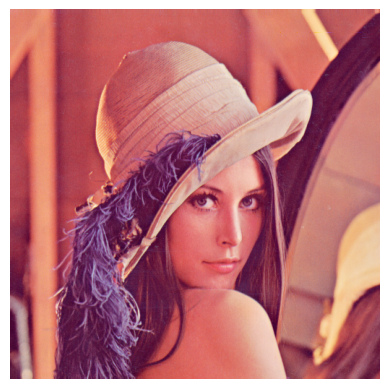

In [215]:
display_ori_image()

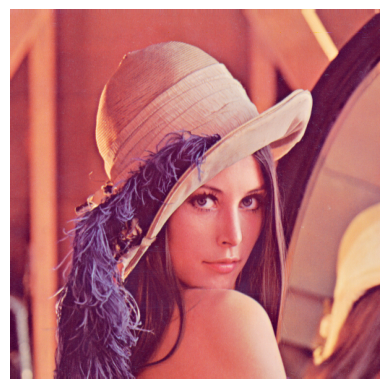

In [216]:
display_image('lsb_only.png')

## Stego Metric

In [217]:
calculate_stego_metrics("lsb_only.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_only.png):
MSE: 0.0009028116861979166
PSNR: 78.57483188820159
SSIM: 0.9999987952461553


(0.0009028116861979166, 78.57483188820159, 0.9999987952461553)

# LSB with ECC

In [218]:
ciphertext

b'\x04\xb6\xd4%\xecYV\x1b\xf7\xcd\x82\xf3i\'\xac\xbb\xe9\xc0\x87]\xcbr\r\xfb[!\x08.\x10\xaa\xfaL1\xfayU_hw\x86%o\xa6Y\x18\xb1\xdf-,#A\xdeS!(\xd6\x06]\n\x17\x85F\xedv2\x9d\x95\x1fM\x16\xf1\x87\xe0{\xba\xa1\xd8L[OZUr{\xa7\xd7\xf2\xc6P\xad0\x8e\x01\xc4\xc7\xa8\t&\x9e\xac\xa1\x84\x1b\x82\xe0\x8fB\x1f\xc4;\xe5\xf2\xc5O\xeep"\x88j,\xc7\x8b\x8d\xa8\xcc\x00\x90w\x9fs\x0e\xa2\x97B\xa1\xf2\x1c]\xb0?9,\xf84\xdbx\xd3k\xa2\x15\xf5\xb15T\xe1\xceQ\xd8\xc8%\xf3|\xcei\xd24\x19\x19b\xc8\xe6\xf2p\xb9\x94\xdf,*6\x823\xfb\xb06S\xcc3\x92\xde\xa2\xc3\x0eJ\xe4II~x\'&\xb7\x03\xe0S\xfc\xec\xfe}\x9d\xe89\xc4>@\t\x1f}\r\x99=\xe4S\x8ea\xa9\xedDp\xf1\'\xe4ej\xb74\xc7\xb0yM\x03\x9a3\x1b9\xac\x90\x9d\x1a\xe6\xa8R\xb5\xc0}F(\x9b\x0b\xb0P\xa6\xe0\x19\xfdC\xcd\xc44?8\xda9\x91\x15'

In [219]:
embed_lsb("lsb_w_ECC.png", ciphertext.hex())

In [220]:
embed_lsb("lsb_test.png", 'l')

In [221]:
extract_lsb("lsb_test.png")

'l'

In [222]:
calculate_stego_metrics("lsb_test.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_test.png):
MSE: 1.7801920572916668e-05
PSNR: 95.62613501860996
SSIM: 0.9999999738635894


(1.7801920572916668e-05, 95.62613501860996, 0.9999999738635894)

In [223]:
extracted_data = extract_lsb("lsb_w_ECC.png")
extracted_data

'04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115'

In [224]:
extracted_data == ciphertext.hex()

True

In [225]:
extracted_data = bytes.fromhex(extracted_data)
extracted_data

b'\x04\xb6\xd4%\xecYV\x1b\xf7\xcd\x82\xf3i\'\xac\xbb\xe9\xc0\x87]\xcbr\r\xfb[!\x08.\x10\xaa\xfaL1\xfayU_hw\x86%o\xa6Y\x18\xb1\xdf-,#A\xdeS!(\xd6\x06]\n\x17\x85F\xedv2\x9d\x95\x1fM\x16\xf1\x87\xe0{\xba\xa1\xd8L[OZUr{\xa7\xd7\xf2\xc6P\xad0\x8e\x01\xc4\xc7\xa8\t&\x9e\xac\xa1\x84\x1b\x82\xe0\x8fB\x1f\xc4;\xe5\xf2\xc5O\xeep"\x88j,\xc7\x8b\x8d\xa8\xcc\x00\x90w\x9fs\x0e\xa2\x97B\xa1\xf2\x1c]\xb0?9,\xf84\xdbx\xd3k\xa2\x15\xf5\xb15T\xe1\xceQ\xd8\xc8%\xf3|\xcei\xd24\x19\x19b\xc8\xe6\xf2p\xb9\x94\xdf,*6\x823\xfb\xb06S\xcc3\x92\xde\xa2\xc3\x0eJ\xe4II~x\'&\xb7\x03\xe0S\xfc\xec\xfe}\x9d\xe89\xc4>@\t\x1f}\r\x99=\xe4S\x8ea\xa9\xedDp\xf1\'\xe4ej\xb74\xc7\xb0yM\x03\x9a3\x1b9\xac\x90\x9d\x1a\xe6\xa8R\xb5\xc0}F(\x9b\x0b\xb0P\xa6\xe0\x19\xfdC\xcd\xc44?8\xda9\x91\x15'

In [226]:
decrypted_message = decrypt(private_key_hex, extracted_data)
print("Decrypted Message:", decrypted_message.decode())

Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [227]:
decrypted_message.decode() == CONTENT

True

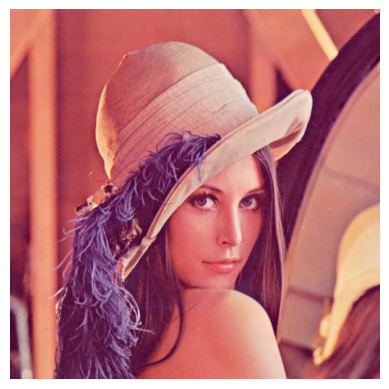

In [228]:
display_image('lsb_w_ECC.png')

## Stego Metric

In [229]:
calculate_stego_metrics("lsb_w_ECC.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_ECC.png):
MSE: 0.002780914306640625
PSNR: 73.68892754501597
SSIM: 0.9999926859992991


(0.002780914306640625, 73.68892754501597, 0.9999926859992991)

In [230]:
len(CONTENT)

177

In [231]:
len(ciphertext.hex())

548

# LSB with LZW

In [232]:
compressed_list

[b'\x19',
 b'\x8c',
 b'\xc6',
 b'\x83',
 b'\x81',
 b'\xb0',
 b'\xc4',
 b'`',
 b'4',
 b'\x18',
 b'\x0c',
 b'G',
 b'#',
 b'q',
 b'\x84',
 b'8',
 b'j',
 b'#',
 b'1',
 b'\x9a',
 b'\x0e',
 b'F',
 b'\x93',
 b'\x99',
 b'\xd0',
 b'\xde',
 b'f',
 b'2',
 b'\x9c',
 b'\x85',
 b'F',
 b'H',
 b'\xd1',
 b'\xa4',
 b'\xc2',
 b'n',
 b'\x15',
 b'\x18',
 b'\x8e',
 b'\xa6',
 b'H',
 b'\xf9',
 b'\xba',
 b'.',
 b'#',
 b':',
 b'\x19',
 b'L',
 b'\xe6',
 b'\x13',
 b'`',
 b'\x8e',
 b'\x17',
 b'\x0c',
 b'\x16',
 b'\x8c',
 b'\x06',
 b's',
 b'!',
 b'\xa0',
 b'\x8c',
 b'\xd8',
 b'a',
 b'5',
 b'\x9a',
 b'E',
 b'\xb3',
 b'\x89',
 b'\xd0',
 b'\x8c',
 b'\xc4',
 b'#',
 b'5',
 b'\x1b',
 b'\x05',
 b'\xc2',
 b'\xa3',
 b'\x84',
 b'\xb4',
 b'\xc2',
 b'*',
 b'\x19',
 b'\x0c',
 b'\x85',
 b'F',
 b'\xe3',
 b'}',
 b'\x10',
 b'f',
 b'0',
 b'\x11',
 b'\xc3',
 b'\xea',
 b'C',
 b'\x11',
 b'\xb8',
 b'\x8c',
 b'\xda',
 b'e',
 b'5',
 b'\x18',
 b'N',
 b'f',
 b'S',
 b'h',
 b'\xaa',
 b'T',
 b'n',
 b'\x96',
 b'\x1a',
 b'\x04',
 b'f',
 b'\xb3',

In [233]:
embed_lsb("lsb_w_LZW.png", compressed_list)

In [234]:
extracted_data = extract_lsb("lsb_w_LZW.png")
extracted_data

'\x19\x8cÆ\x83\x81°Ä`4\x18\x0cG#q\x848j#1\x9a\x0eF\x93\x99ÐÞf2\x9c\x85FHÑ¤Ân\x15\x18\x8e¦Hùº.#:\x19Læ\x13`\x8e\x17\x0c\x16\x8c\x06s!\xa0\x8cØa5\x9aE³\x89Ð\x8cÄ#5\x1b\x05Â£\x84´Â*\x19\x0c\x85Fã}\x10f0\x11ÃêC\x11¸\x8cÚe5\x18NfShªTn\x96\x1a\x04f³\x91\x84Úa:Y-&\x83y°Òk\x9f\x99M\x87Zñ¬Âw4\x9b\x84g\x0b\x99\x86´r\x17Ú\r\x15¸©ÜÂ#;\x9b\x8d":åÔë\x1b4\x1aL\x87S\x84\x00'

In [235]:
byte_list = [bytes([ord(char)]) for char in extracted_data]
byte_list

[b'\x19',
 b'\x8c',
 b'\xc6',
 b'\x83',
 b'\x81',
 b'\xb0',
 b'\xc4',
 b'`',
 b'4',
 b'\x18',
 b'\x0c',
 b'G',
 b'#',
 b'q',
 b'\x84',
 b'8',
 b'j',
 b'#',
 b'1',
 b'\x9a',
 b'\x0e',
 b'F',
 b'\x93',
 b'\x99',
 b'\xd0',
 b'\xde',
 b'f',
 b'2',
 b'\x9c',
 b'\x85',
 b'F',
 b'H',
 b'\xd1',
 b'\xa4',
 b'\xc2',
 b'n',
 b'\x15',
 b'\x18',
 b'\x8e',
 b'\xa6',
 b'H',
 b'\xf9',
 b'\xba',
 b'.',
 b'#',
 b':',
 b'\x19',
 b'L',
 b'\xe6',
 b'\x13',
 b'`',
 b'\x8e',
 b'\x17',
 b'\x0c',
 b'\x16',
 b'\x8c',
 b'\x06',
 b's',
 b'!',
 b'\xa0',
 b'\x8c',
 b'\xd8',
 b'a',
 b'5',
 b'\x9a',
 b'E',
 b'\xb3',
 b'\x89',
 b'\xd0',
 b'\x8c',
 b'\xc4',
 b'#',
 b'5',
 b'\x1b',
 b'\x05',
 b'\xc2',
 b'\xa3',
 b'\x84',
 b'\xb4',
 b'\xc2',
 b'*',
 b'\x19',
 b'\x0c',
 b'\x85',
 b'F',
 b'\xe3',
 b'}',
 b'\x10',
 b'f',
 b'0',
 b'\x11',
 b'\xc3',
 b'\xea',
 b'C',
 b'\x11',
 b'\xb8',
 b'\x8c',
 b'\xda',
 b'e',
 b'5',
 b'\x18',
 b'N',
 b'f',
 b'S',
 b'h',
 b'\xaa',
 b'T',
 b'n',
 b'\x96',
 b'\x1a',
 b'\x04',
 b'f',
 b'\xb3',

In [236]:
compressed_list == byte_list

True

In [237]:
# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(byte_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

print("Decompressed Text (String):", decompressed_text)

Decompressed Text (String): 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [238]:
decompressed_text == CONTENT

True

## Stego Metric

In [239]:
calculate_stego_metrics("lsb_w_LZW.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_LZW.png):
MSE: 0.0008722941080729166
PSNR: 78.72417421832482
SSIM: 0.9999988544716335


(0.0008722941080729166, 78.72417421832482, 0.9999988544716335)

# LSB with ECC, LZW

## ECC

In [240]:
ciphertext.hex()

'04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115'

## LZW

In [241]:
import lzw

# Example text to compress (can be any string)
original_text = ciphertext.hex()

# Convert the original text into bytes (UTF-8 encoding)
original_bytes = original_text.encode('utf-8')

# Part 1: Compression (in-memory)
compressed = lzw.compress(original_bytes)

# Convert compressed generator to a list to see its contents
compressed_list = list(compressed)

# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(compressed_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

# Print each variable
print("Original Text (String):", original_text)
print("Original Bytes:", original_bytes)
print("Compressed List (Byte Chunks):", compressed_list)
print("Decompressed Bytes:", decompressed_bytes)
print("Decompressed Text (String):", decompressed_text)

# Part 3: Print sizes and results for comparison
original_size = len(original_bytes)
compressed_size = len(b"".join(compressed_list))  # Join to get compressed byte size
decompressed_size = len(decompressed_bytes)

# Print the sizes in bytes
print(f"\nOriginal size: {original_size} bytes")
print(f"Compressed size: {compressed_size} bytes")
print(f"Decompressed size: {decompressed_size} bytes")

# Check if decompression was successful
if decompressed_text == original_text:
    print("Decompression was successful!")
else:
    print("Decompression failed.")

Original Text (String): 04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115
Original Bytes: b'04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053f

In [242]:
len(ciphertext.hex())

548

In [243]:
((548 - 416) / 548) *  100

24.087591240875913

In [244]:
548 / 132

4.151515151515151

In [245]:
percentage_ = (len(ciphertext.hex()) - len(compressed_list)) / len(ciphertext.hex()) * 100
percentage_

20.255474452554743

## LSB

In [246]:
compressed_list

[b'\x18',
 b'\r',
 b'\x0c',
 b'C',
 b'c',
 b' ',
 b'\xd0',
 b'd',
 b'5',
 b'2',
 b'\x98',
 b'\xc6',
 b'\xa3',
 b'\x91',
 b'\xa8',
 b'\xd8',
 b'b',
 b'b',
 b'3',
 b'\r',
 b'\xcc',
 b'f',
 b'A',
 b'\xc0',
 b'\xc8',
 b'\xcc',
 b'3',
 b'\x1b',
 b'\x0e',
 b'F',
 b'C',
 b's',
 b'\t',
 b'\x8c',
 b'\xc4',
 b'b',
 b'2',
 b'\x8e',
 b'L',
 b'c',
 b'\x01',
 b'\xc0',
 b'\xdc',
 b'j',
 b'd',
 b'\x8f',
 b'\x8d',
 b'\xc6',
 b'C',
 b'\x03',
 b'!',
 b'\x98',
 b'\xc4',
 b'5',
 b'1',
 b'\x0c',
 b'\x86',
 b'2',
 b'Q',
 b'\x91',
 b'\x96',
 b'h',
 b'a',
 b'0',
 b'\x99',
 b'\x8c',
 b'#',
 b'C',
 b'\x18',
 b'\xcc',
 b'c',
 b';',
 b'\x1b',
 b'\xc3',
 b'F',
 b'\xa3',
 b'S',
 b'0',
 b'\xda',
 b'L',
 b'7',
 b'\x1c',
 b'\r',
 b'\xa1',
 b'\x03',
 b'i',
 b'\xd8',
 b'\xda',
 b'\x18',
 b'1',
 b'\x1c',
 b'\x18',
 b'\x86',
 b'2',
 b'\xe1',
 b'\x91',
 b'\x90',
 b'd',
 b'c',
 b'\x19',
 b'\x0c',
 b'\xc6',
 b'\x95',
 b'C',
 b'(',
 b'\xd4',
 b'g',
 b'3',
 b'\x19',
 b'\x0e',
 b'\x0c',
 b'\x83',
 b'a',
 b'\x85',
 b'<',
 b'\xc8'

In [247]:
embed_lsb("lsb_w_ECC_LZW.png", compressed_list)

In [248]:
extracted_data = extract_lsb("lsb_w_ECC_LZW.png")
extracted_data

'\x18\r\x0cCc Ðd52\x98Æ£\x91¨Øbb3\rÌfAÀÈÌ3\x1b\x0eFCs\t\x8cÄb2\x8eLc\x01ÀÜjd\x8f\x8dÆC\x03!\x98Ä51\x0c\x862Q\x91\x96ha0\x99\x8c#C\x18Ìc;\x1bÃF£S0ÚL7\x1c\r¡\x03iØÚ\x181\x1c\x18\x862á\x91\x90dc\x19\x0cÆ\x95C(Ôg3\x19\x0e\x0c\x83a\x85<È00\x8ci#Q\xa0ØÊd\x1b\x8d¬\x03\x93$6\x8042\x0ciµ\x11¹\x94`7\x90Nj\x83\x89ìÄhf\x1a\x98h\x92¼\t\x84oq3V)ö\x93 ÎK\x7f\x18\x98ç±ÑÀÂ7\x1a2Ç\xadXX\x84Zþ83Aè\x19±\x9c\x86\x8bX¶\x99\x8c¦Q¸Àeb¥\x18k\x06:I\x8aÆa\x1c\x18ä\x99ü\x05\n%\x97Ñ\x0c\x87#x=«%\x9a\x94\x18\x86\x038ÄlÆf\x1cVÌ\x86*NXlbÝ\x8ch³\x11\x88Î\x884\x9b\x98ëØC\x1cZ\x8a3\x89úãUzØÄs÷¥û\x8c´ØàÀb\x0eC\x95å\x92VF\x14e\x16\x0cÝT\x81ÔSÃ7\x0e\tFÆG)>\x0c\x06PÐa\x85\x83H\tÌmQd\xadàm\x835ý_\x19\x9e·aµ]¡\'i#\r" Ð0gÔ\x06A-\x80C8H4WÃ\x87ð1\x18C\x95À4\r\x1ba\x981G!e<6\x18]Õm½tÔ%åÔ\x0e`düb\x0cå\x11\x8c9g×¨bH\x0e\x03PÉ0I\x19\x05¹b\x0e]8,5ZVðÁ÷\x19\x90h9)\x8bbÔaÀ\x95_\x87\x8d\x00'

In [249]:
byte_list = [bytes([ord(char)]) for char in extracted_data]
byte_list

[b'\x18',
 b'\r',
 b'\x0c',
 b'C',
 b'c',
 b' ',
 b'\xd0',
 b'd',
 b'5',
 b'2',
 b'\x98',
 b'\xc6',
 b'\xa3',
 b'\x91',
 b'\xa8',
 b'\xd8',
 b'b',
 b'b',
 b'3',
 b'\r',
 b'\xcc',
 b'f',
 b'A',
 b'\xc0',
 b'\xc8',
 b'\xcc',
 b'3',
 b'\x1b',
 b'\x0e',
 b'F',
 b'C',
 b's',
 b'\t',
 b'\x8c',
 b'\xc4',
 b'b',
 b'2',
 b'\x8e',
 b'L',
 b'c',
 b'\x01',
 b'\xc0',
 b'\xdc',
 b'j',
 b'd',
 b'\x8f',
 b'\x8d',
 b'\xc6',
 b'C',
 b'\x03',
 b'!',
 b'\x98',
 b'\xc4',
 b'5',
 b'1',
 b'\x0c',
 b'\x86',
 b'2',
 b'Q',
 b'\x91',
 b'\x96',
 b'h',
 b'a',
 b'0',
 b'\x99',
 b'\x8c',
 b'#',
 b'C',
 b'\x18',
 b'\xcc',
 b'c',
 b';',
 b'\x1b',
 b'\xc3',
 b'F',
 b'\xa3',
 b'S',
 b'0',
 b'\xda',
 b'L',
 b'7',
 b'\x1c',
 b'\r',
 b'\xa1',
 b'\x03',
 b'i',
 b'\xd8',
 b'\xda',
 b'\x18',
 b'1',
 b'\x1c',
 b'\x18',
 b'\x86',
 b'2',
 b'\xe1',
 b'\x91',
 b'\x90',
 b'd',
 b'c',
 b'\x19',
 b'\x0c',
 b'\xc6',
 b'\x95',
 b'C',
 b'(',
 b'\xd4',
 b'g',
 b'3',
 b'\x19',
 b'\x0e',
 b'\x0c',
 b'\x83',
 b'a',
 b'\x85',
 b'<',
 b'\xc8'

In [250]:
compressed_list == byte_list

True

In [251]:
# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(byte_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

print("Decompressed Text (String):", decompressed_text)

Decompressed Text (String): 04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115


In [252]:
decompressed_text == ciphertext.hex()

True

In [253]:
cipher_data = bytes.fromhex(decompressed_text)
cipher_data

b'\x04\xb6\xd4%\xecYV\x1b\xf7\xcd\x82\xf3i\'\xac\xbb\xe9\xc0\x87]\xcbr\r\xfb[!\x08.\x10\xaa\xfaL1\xfayU_hw\x86%o\xa6Y\x18\xb1\xdf-,#A\xdeS!(\xd6\x06]\n\x17\x85F\xedv2\x9d\x95\x1fM\x16\xf1\x87\xe0{\xba\xa1\xd8L[OZUr{\xa7\xd7\xf2\xc6P\xad0\x8e\x01\xc4\xc7\xa8\t&\x9e\xac\xa1\x84\x1b\x82\xe0\x8fB\x1f\xc4;\xe5\xf2\xc5O\xeep"\x88j,\xc7\x8b\x8d\xa8\xcc\x00\x90w\x9fs\x0e\xa2\x97B\xa1\xf2\x1c]\xb0?9,\xf84\xdbx\xd3k\xa2\x15\xf5\xb15T\xe1\xceQ\xd8\xc8%\xf3|\xcei\xd24\x19\x19b\xc8\xe6\xf2p\xb9\x94\xdf,*6\x823\xfb\xb06S\xcc3\x92\xde\xa2\xc3\x0eJ\xe4II~x\'&\xb7\x03\xe0S\xfc\xec\xfe}\x9d\xe89\xc4>@\t\x1f}\r\x99=\xe4S\x8ea\xa9\xedDp\xf1\'\xe4ej\xb74\xc7\xb0yM\x03\x9a3\x1b9\xac\x90\x9d\x1a\xe6\xa8R\xb5\xc0}F(\x9b\x0b\xb0P\xa6\xe0\x19\xfdC\xcd\xc44?8\xda9\x91\x15'

In [254]:
decrypted_message = decrypt(private_key_hex, cipher_data)
print("Decrypted Message:", decrypted_message.decode())

Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [255]:
decrypted_message.decode() == CONTENT

True

## Stego Metric

In [256]:
calculate_stego_metrics("lsb_w_ECC_LZW.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_ECC_LZW.png):
MSE: 0.0022710164388020835
PSNR: 74.56860082986707
SSIM: 0.9999948340613126


(0.0022710164388020835, 74.56860082986707, 0.9999948340613126)

# LSB with Huffman

In [257]:
compressed_data

bytearray(b'\x02\xdfy>\xa8\x7f\x12G\xf7S\x11\x1e\xfb\xedYu\xcf\xc6)\x91\xd52\xe6\xc3\xa3usi\xf9\xd3OD;\xfb\xae\xa6\xf8\xde\xf8\x93\x80\xe1\xef\x03\x87\xed9\x90\xa2;\x10#\xf3\xe0\xdb\xca#\xbctG\xbe\x8f\xe9\xea\xa3%iQ\x9a[\xd1Wc&\xa6}\x835x\x0f\x8e\xd1\x01\xb5\x1c\x19^\xdd\xb2\x01d\xe5\x85J\x8a\xddr\x9e\x96\xcf\xcbF\xd5\xb9\x15>\xad\xd8')

In [258]:
compressed_data.hex()

'02df793ea87f1247f753111efbed5975cfc62991d532e6c3a3757369f9d34f443bfbaea6f8def89380e1ef0387ed3990a23b1023f3e0dbca23bc7447be8fe9eaa32569519a5bd1576326a67d8335780f8ed101b51c195eddb20164e5854a8add729e96cfcb46d5b9153eadd8'

In [259]:
embed_lsb("lsb_w_Huffman.png", compressed_data.hex())

In [260]:
extracted_data = extract_lsb("lsb_w_Huffman.png")
extracted_data

'02df793ea87f1247f753111efbed5975cfc62991d532e6c3a3757369f9d34f443bfbaea6f8def89380e1ef0387ed3990a23b1023f3e0dbca23bc7447be8fe9eaa32569519a5bd1576326a67d8335780f8ed101b51c195eddb20164e5854a8add729e96cfcb46d5b9153eadd8'

In [261]:
len(extract_lsb("lsb_w_Huffman.png"))

216

In [262]:
len(CONTENT)

177

In [263]:
huffman_data = bytearray.fromhex(extracted_data)
huffman_data

bytearray(b'\x02\xdfy>\xa8\x7f\x12G\xf7S\x11\x1e\xfb\xedYu\xcf\xc6)\x91\xd52\xe6\xc3\xa3usi\xf9\xd3OD;\xfb\xae\xa6\xf8\xde\xf8\x93\x80\xe1\xef\x03\x87\xed9\x90\xa2;\x10#\xf3\xe0\xdb\xca#\xbctG\xbe\x8f\xe9\xea\xa3%iQ\x9a[\xd1Wc&\xa6}\x835x\x0f\x8e\xd1\x01\xb5\x1c\x19^\xdd\xb2\x01d\xe5\x85J\x8a\xddr\x9e\x96\xcf\xcbF\xd5\xb9\x15>\xad\xd8')

In [264]:
decompressed_data = huffman_decompress(huffman_data, huffman_tree)
print("Decompressed Data (as bytes):", decompressed_data)
print("Decompressed Data (as string):", decompressed_data.decode())

Decompressed Data (as bytes): bytearray(b'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup')
Decompressed Data (as string): 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [265]:
decompressed_data.decode() == CONTENT

True

## Stego Metric

In [266]:
calculate_stego_metrics("lsb_w_Huffman.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_Huffman.png):
MSE: 0.00107574462890625
PSNR: 77.81371174500211
SSIM: 0.9999984186394683


(0.00107574462890625, 77.81371174500211, 0.9999984186394683)

# LSB with ECC, Huffman

## ECC

In [267]:
ciphertext.hex()

'04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115'

## Huffman

In [268]:
# Example Usage of Huffman Compression/Decompression

# Step 1: The original plaintext data (as a byte string)
plaintext = ciphertext.hex().encode()

# Print the original data
print("Original Data (as bytes):", plaintext)
print("Original Data (as string):", plaintext.decode())

# Step 2: Compress the plaintext data using Huffman encoding
compressed_data, huffman_tree = huffman_compress(plaintext)
print("Compressed Data (in bytes):", compressed_data)

Original Data (as bytes): b'04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115'
Original Data (as string): 04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e7

## LSB

In [269]:
compressed_data

bytearray(b'\x08\xa7\x10\x87\xf9\\\x9b\x90a-\xc8O.\x0b\xfd<\x11[\xcaM\x98\xc1\xdf\xa8!\x91\xf6\xa4\xf5j3#|\xe6#\xdb\x99\x92\x04\xdd@\xf9\x020\x9bd\x16\x82\xf8\xfc\xfev\x85\x9e\xf6\xf4\x80\xa0\x98\xa3mIpX\xd0\xef\xb8\xb9bx`&MZ\xd1\x136\x84|\x91r\x93\x99\xdf\xd1=\x8d/\xc0\x9a8\xeaE\xa6\xc7\xcd4\xab\xf0\xb5<6GaOZB\x7fb\xc7\xe1Y/\xc9rU\xda\xffD\x03\xfc\xcdAH4\xcc\xaa\xba\xdd\xb2\xde\xa5?\xbd\x7f6/l\x98\x1a\xe2\xeb\xfc$\xe7\x81\xd4\x8e\x01?i)\x16\xe9\x97V\xc5\x96\x84\xc4\xf9.\xdc\xc5\x0b\x8f\xe7kk\x0f\xc4P/\xda\x1b\xb7\x82\xfc\xf3\xe0O\xee!\x1a\xe0\x9e\xcc\xee\xbf\x85?\xce\xa5sW{{\xd5\xd4\xfd\xf0\x1d\xaeZ\x9e,\\%\xd8\xb8T\xeb\xc7\xe5z\xabb\xd8\xa8\xbb\xe8W\x9eE\x06;Xw\xda&\xfdW\t\x03\x1d\xe7\xcd\x1a\xdbx\xae\xb3\xeea\xeb<\xba\xb8cP4\x9f\x19\xca\xd8p\xf4\xb1\xa1\x1a\x9a0Zk(~\xc8\xc7\xe7\xe2\xe4\x83\xeb\xb6i\x00')

In [270]:
compressed_data.hex()

'08a71087f95c9b90612dc84f2e0bfd3c115bca4d98c1dfa82191f6a4f56a33237ce623db999204dd40f902309b641682f8fcfe76859ef6f480a098a36d497058d0efb8b9627860264d5ad11336847c91729399dfd13d8d2fc09a38ea45a6c7cd34abf0b53c3647614f5a427f62c7e1592fc97255daff4403fccd414834ccaabaddb2dea53fbd7f362f6c981ae2ebfc24e781d48e013f692916e99756c59684c4f92edcc50b8fe76b6b0fc4502fda1bb782fcf3e04fee211ae09ecceebf853fcea573577b7bd5d4fdf01dae5a9e2c5c25d8b854ebc7e57aab62d8a8bbe8579e45063b5877da26fd5709031de7cd1adb78aeb3ee61eb3cbab86350349f19cad870f4b1a11a9a305a6b287ec8c7e7e2e483ebb66900'

In [271]:
len(compressed_data.hex())

552

In [272]:
len(ciphertext.hex())

548

In [273]:
embed_lsb('LSB_w_ECC_Huffman.png', compressed_data.hex())

In [274]:
extracted_data = extract_lsb('LSB_w_ECC_Huffman.png')
extracted_data

'08a71087f95c9b90612dc84f2e0bfd3c115bca4d98c1dfa82191f6a4f56a33237ce623db999204dd40f902309b641682f8fcfe76859ef6f480a098a36d497058d0efb8b9627860264d5ad11336847c91729399dfd13d8d2fc09a38ea45a6c7cd34abf0b53c3647614f5a427f62c7e1592fc97255daff4403fccd414834ccaabaddb2dea53fbd7f362f6c981ae2ebfc24e781d48e013f692916e99756c59684c4f92edcc50b8fe76b6b0fc4502fda1bb782fcf3e04fee211ae09ecceebf853fcea573577b7bd5d4fdf01dae5a9e2c5c25d8b854ebc7e57aab62d8a8bbe8579e45063b5877da26fd5709031de7cd1adb78aeb3ee61eb3cbab86350349f19cad870f4b1a11a9a305a6b287ec8c7e7e2e483ebb66900'

In [275]:
huffman_data = bytearray.fromhex(extracted_data)
huffman_data

bytearray(b'\x08\xa7\x10\x87\xf9\\\x9b\x90a-\xc8O.\x0b\xfd<\x11[\xcaM\x98\xc1\xdf\xa8!\x91\xf6\xa4\xf5j3#|\xe6#\xdb\x99\x92\x04\xdd@\xf9\x020\x9bd\x16\x82\xf8\xfc\xfev\x85\x9e\xf6\xf4\x80\xa0\x98\xa3mIpX\xd0\xef\xb8\xb9bx`&MZ\xd1\x136\x84|\x91r\x93\x99\xdf\xd1=\x8d/\xc0\x9a8\xeaE\xa6\xc7\xcd4\xab\xf0\xb5<6GaOZB\x7fb\xc7\xe1Y/\xc9rU\xda\xffD\x03\xfc\xcdAH4\xcc\xaa\xba\xdd\xb2\xde\xa5?\xbd\x7f6/l\x98\x1a\xe2\xeb\xfc$\xe7\x81\xd4\x8e\x01?i)\x16\xe9\x97V\xc5\x96\x84\xc4\xf9.\xdc\xc5\x0b\x8f\xe7kk\x0f\xc4P/\xda\x1b\xb7\x82\xfc\xf3\xe0O\xee!\x1a\xe0\x9e\xcc\xee\xbf\x85?\xce\xa5sW{{\xd5\xd4\xfd\xf0\x1d\xaeZ\x9e,\\%\xd8\xb8T\xeb\xc7\xe5z\xabb\xd8\xa8\xbb\xe8W\x9eE\x06;Xw\xda&\xfdW\t\x03\x1d\xe7\xcd\x1a\xdbx\xae\xb3\xeea\xeb<\xba\xb8cP4\x9f\x19\xca\xd8p\xf4\xb1\xa1\x1a\x9a0Zk(~\xc8\xc7\xe7\xe2\xe4\x83\xeb\xb6i\x00')

In [276]:
decompressed_data = huffman_decompress(huffman_data, huffman_tree)
print("Decompressed Data (as bytes):", decompressed_data)
print("Decompressed Data (as string):", decompressed_data.decode())

Decompressed Data (as bytes): bytearray(b'04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115')
Decompressed Data (as string): 04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392

In [277]:
cipher_data = bytes.fromhex(decompressed_data.decode())
cipher_data

b'\x04\xb6\xd4%\xecYV\x1b\xf7\xcd\x82\xf3i\'\xac\xbb\xe9\xc0\x87]\xcbr\r\xfb[!\x08.\x10\xaa\xfaL1\xfayU_hw\x86%o\xa6Y\x18\xb1\xdf-,#A\xdeS!(\xd6\x06]\n\x17\x85F\xedv2\x9d\x95\x1fM\x16\xf1\x87\xe0{\xba\xa1\xd8L[OZUr{\xa7\xd7\xf2\xc6P\xad0\x8e\x01\xc4\xc7\xa8\t&\x9e\xac\xa1\x84\x1b\x82\xe0\x8fB\x1f\xc4;\xe5\xf2\xc5O\xeep"\x88j,\xc7\x8b\x8d\xa8\xcc\x00\x90w\x9fs\x0e\xa2\x97B\xa1\xf2\x1c]\xb0?9,\xf84\xdbx\xd3k\xa2\x15\xf5\xb15T\xe1\xceQ\xd8\xc8%\xf3|\xcei\xd24\x19\x19b\xc8\xe6\xf2p\xb9\x94\xdf,*6\x823\xfb\xb06S\xcc3\x92\xde\xa2\xc3\x0eJ\xe4II~x\'&\xb7\x03\xe0S\xfc\xec\xfe}\x9d\xe89\xc4>@\t\x1f}\r\x99=\xe4S\x8ea\xa9\xedDp\xf1\'\xe4ej\xb74\xc7\xb0yM\x03\x9a3\x1b9\xac\x90\x9d\x1a\xe6\xa8R\xb5\xc0}F(\x9b\x0b\xb0P\xa6\xe0\x19\xfdC\xcd\xc44?8\xda9\x91\x15'

In [278]:
decrypted_message = decrypt(private_key_hex, cipher_data)
print("Decrypted Message:", decrypted_message.decode())

Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


In [279]:
decrypted_message.decode() == CONTENT

True

## Stego Metric

In [280]:
calculate_stego_metrics('LSB_w_ECC_Huffman.png')

Metrics between original (ori-image/lena.png) and stego image (LSB_w_ECC_Huffman.png):
MSE: 0.002780914306640625
PSNR: 73.68892754501597
SSIM: 0.999992949218652


(0.002780914306640625, 73.68892754501597, 0.999992949218652)

# Test

In [281]:
ciphertexts

'W1tbNTc4LCA5OV0sIFs0MDEsIDE1M11dLCBbWzU3OCwgOTldLCBbNDg4LCA1OV1dLCBbWzU3OCwgOTldLCBbNjQsIDczOF1dLCBbWzU3OCwgOTldLCBbMzMzLCA0MzVdXSwgW1s1NzgsIDk5XSwgWzQ4NSwgMTNdXSwgW1s1NzgsIDk5XSwgWzM4NywgNjkyXV0sIFtbNTc4LCA5OV0sIFs0OTYsIDk3XV0sIFtbNTc4LCA5OV0sIFs3NDAsIDM4OV1dLCBbWzU3OCwgOTldLCBbNjE3LCAxNDldXSwgW1s1NzgsIDk5XSwgWzUyOSwgNDk3XV1d'

In [282]:
embed_lsb("lsb_tests.png", ciphertexts)

In [283]:
512 * 512 * 3

786432

In [284]:
extract_lsb("lsb_tests.png")

'W1tbNTc4LCA5OV0sIFs0MDEsIDE1M11dLCBbWzU3OCwgOTldLCBbNDg4LCA1OV1dLCBbWzU3OCwgOTldLCBbNjQsIDczOF1dLCBbWzU3OCwgOTldLCBbMzMzLCA0MzVdXSwgW1s1NzgsIDk5XSwgWzQ4NSwgMTNdXSwgW1s1NzgsIDk5XSwgWzM4NywgNjkyXV0sIFtbNTc4LCA5OV0sIFs0OTYsIDk3XV0sIFtbNTc4LCA5OV0sIFs3NDAsIDM4OV1dLCBbWzU3OCwgOTldLCBbNjE3LCAxNDldXSwgW1s1NzgsIDk5XSwgWzUyOSwgNDk3XV1d'

In [285]:
extract_lsb("lsb_tests.png") == ciphertexts

True

In [286]:
calculate_stego_metrics("lsb_tests.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_tests.png):
MSE: 0.001659393310546875
PSNR: 75.93131025864935
SSIM: 0.999996930104198


(0.001659393310546875, 75.93131025864935, 0.999996930104198)

In [287]:
import lzw

# Example text to compress (can be any string)
original_text = ciphertexts

# Convert the original text into bytes (UTF-8 encoding)
original_bytes = original_text.encode('utf-8')

# Part 1: Compression (in-memory)
compressed = lzw.compress(original_bytes)

# Convert compressed generator to a list to see its contents
compressed_list = list(compressed)

# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(compressed_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

# Print each variable
print("Original Text (String):", original_text)
print("Original Bytes:", original_bytes)
print("Compressed List (Byte Chunks):", compressed_list)
print("Decompressed Bytes:", decompressed_bytes)
print("Decompressed Text (String):", decompressed_text)

# Part 3: Print sizes and results for comparison
original_size = len(original_bytes)
compressed_size = len(b"".join(compressed_list))  # Join to get compressed byte size
decompressed_size = len(decompressed_bytes)

# Print the sizes in bytes
print(f"\nOriginal size: {original_size} bytes")
print(f"Compressed size: {compressed_size} bytes")
print(f"Decompressed size: {decompressed_size} bytes")

# Check if decompression was successful
if decompressed_text == original_text:
    print("Decompression was successful!")
else:
    print("Decompression failed.")

Original Text (String): W1tbNTc4LCA5OV0sIFs0MDEsIDE1M11dLCBbWzU3OCwgOTldLCBbNDg4LCA1OV1dLCBbWzU3OCwgOTldLCBbNjQsIDczOF1dLCBbWzU3OCwgOTldLCBbMzMzLCA0MzVdXSwgW1s1NzgsIDk5XSwgWzQ4NSwgMTNdXSwgW1s1NzgsIDk5XSwgWzM4NywgNjkyXV0sIFtbNTc4LCA5OV0sIFs0OTYsIDk3XV0sIFtbNTc4LCA5OV0sIFs3NDAsIDM4OV1dLCBbWzU3OCwgOTldLCBbNjE3LCAxNDldXSwgW1s1NzgsIDk5XSwgWzUyOSwgNDk3XV1d
Original Bytes: b'W1tbNTc4LCA5OV0sIFs0MDEsIDE1M11dLCBbWzU3OCwgOTldLCBbNDg4LCA1OV1dLCBbWzU3OCwgOTldLCBbNjQsIDczOF1dLCBbWzU3OCwgOTldLCBbMzMzLCA0MzVdXSwgW1s1NzgsIDk5XSwgWzQ4NSwgMTNdXSwgW1s1NzgsIDk5XSwgWzM4NywgNjkyXV0sIFtbNTc4LCA5OV0sIFs0OTYsIDk3XV0sIFtbNTc4LCA5OV0sIFs3NDAsIDM4OV1dLCBbWzU3OCwgOTldLCBbNjE3LCAxNDldXSwgW1s1NzgsIDk5XSwgWzUyOSwgNDk3XV1d'
Compressed List (Byte Chunks): [b'+', b'\x8c', b'N', b'\x86', b'"', b'q', b'P', b'\xc6', b'4', b'&', b'\x10', b'\xc8', b'#', b'R', b'y', b'X', b'`', b's', b'$', b'\x91', b'\x8e', b'c', b'\x02', b'i', b'\x10', b'\x8b', b'\x11', b'\x8b', b'\x8c', b'I', b'\xa3', b'\x11', b'\x89', b'\x92', b'\x14', b'B

In [288]:
embed_lsb("lsb_test_again.png", compressed_list)

In [289]:
compressed_list

[b'+',
 b'\x8c',
 b'N',
 b'\x86',
 b'"',
 b'q',
 b'P',
 b'\xc6',
 b'4',
 b'&',
 b'\x10',
 b'\xc8',
 b'#',
 b'R',
 b'y',
 b'X',
 b'`',
 b's',
 b'$',
 b'\x91',
 b'\x8e',
 b'c',
 b'\x02',
 b'i',
 b'\x10',
 b'\x8b',
 b'\x11',
 b'\x8b',
 b'\x8c',
 b'I',
 b'\xa3',
 b'\x11',
 b'\x89',
 b'\x92',
 b'\x14',
 b'B',
 b'1',
 b'\x15',
 b'\xcf',
 b'E',
 b'Q',
 b'\x99',
 b'<',
 b'\x86',
 b'w',
 b'3',
 b'\x93',
 b'\xca',
 b'\x86',
 b'\xc8',
 b'\xf9',
 b'\x0e',
 b'B',
 b'N',
 b'"',
 b'\x19',
 b'\xe1',
 b'0',
 b'\xb1',
 b'\x8c',
 b':',
 b'=',
 b' ',
 b'\x91',
 b'I',
 b'$',
 b'\xd2',
 b'\x89',
 b'T',
 b'\xb2',
 b']',
 b'0',
 b'5',
 b'\x14',
 b'c',
 b'&',
 b'3',
 b'\xd1',
 b'<',
 b'\x8d',
 b'8',
 b'\x97',
 b'\xce',
 b'\xa4',
 b'\xb2',
 b'y',
 b'L',
 b'\xae',
 b'[',
 b'9',
 b'&',
 b'\x9e',
 b'\xaa',
 b'P',
 b'\xa2',
 b'\x0c',
 b'T',
 b'\xf4',
 b'V',
 b'2',
 b'\x16',
 b'\n',
 b'r',
 b'\x98',
 b'\x11',
 b'\xcc',
 b'b',
 b'N',
 b'=',
 b'\x19',
 b'\xe3',
 b'&',
 b'\xb1',
 b'\xad',
 b'n',
 b'\xba',
 b'z',
 b'(',

In [290]:
ext_data = extract_lsb("lsb_test_again.png")
ext_data

'+\x8cN\x86"qPÆ4&\x10È#RyX`s$\x91\x8ec\x02i\x10\x8b\x11\x8b\x8cI£\x11\x89\x92\x14B1\x15ÏEQ\x99<\x86w3\x93Ê\x86Èù\x0eBN"\x19á0±\x8c:= \x91I$Ò\x89T²]05\x14c&3Ñ<\x8d8\x97Î¤²yL®[9&\x9eªP¢\x0cTôV2\x16\nr\x98\x11ÌbN=\x19ã&±\xadnºz(\x8d\tÕÃ94¨N\xad[kÖ\x0b\x15\x92Ís©ÚÏ2\x92q¨Öy,Câ$h$\x1a\x11U\x86àâQIYfÈ3ÁD"Xh<Ò\x19\x0eÉÄÆs\x12\x0cd\x9a4\x9bÐ)sÊtþs~"\x8cê§\x89\x8c¶ÎgºXld\x92%\x97a#*\x9eIöÙ\x89¯"V\x8f@\x00'

In [291]:
byte_list = [bytes([ord(char)]) for char in ext_data]
byte_list

[b'+',
 b'\x8c',
 b'N',
 b'\x86',
 b'"',
 b'q',
 b'P',
 b'\xc6',
 b'4',
 b'&',
 b'\x10',
 b'\xc8',
 b'#',
 b'R',
 b'y',
 b'X',
 b'`',
 b's',
 b'$',
 b'\x91',
 b'\x8e',
 b'c',
 b'\x02',
 b'i',
 b'\x10',
 b'\x8b',
 b'\x11',
 b'\x8b',
 b'\x8c',
 b'I',
 b'\xa3',
 b'\x11',
 b'\x89',
 b'\x92',
 b'\x14',
 b'B',
 b'1',
 b'\x15',
 b'\xcf',
 b'E',
 b'Q',
 b'\x99',
 b'<',
 b'\x86',
 b'w',
 b'3',
 b'\x93',
 b'\xca',
 b'\x86',
 b'\xc8',
 b'\xf9',
 b'\x0e',
 b'B',
 b'N',
 b'"',
 b'\x19',
 b'\xe1',
 b'0',
 b'\xb1',
 b'\x8c',
 b':',
 b'=',
 b' ',
 b'\x91',
 b'I',
 b'$',
 b'\xd2',
 b'\x89',
 b'T',
 b'\xb2',
 b']',
 b'0',
 b'5',
 b'\x14',
 b'c',
 b'&',
 b'3',
 b'\xd1',
 b'<',
 b'\x8d',
 b'8',
 b'\x97',
 b'\xce',
 b'\xa4',
 b'\xb2',
 b'y',
 b'L',
 b'\xae',
 b'[',
 b'9',
 b'&',
 b'\x9e',
 b'\xaa',
 b'P',
 b'\xa2',
 b'\x0c',
 b'T',
 b'\xf4',
 b'V',
 b'2',
 b'\x16',
 b'\n',
 b'r',
 b'\x98',
 b'\x11',
 b'\xcc',
 b'b',
 b'N',
 b'=',
 b'\x19',
 b'\xe3',
 b'&',
 b'\xb1',
 b'\xad',
 b'n',
 b'\xba',
 b'z',
 b'(',

In [292]:
compressed_list == byte_list

True

In [293]:
# Part 2: Decompression (in-memory)
decompressed_chunks = lzw.decompress(byte_list)

# Join the decompressed chunks into a single byte string
decompressed_bytes = b"".join(decompressed_chunks)

# Convert decompressed bytes back to a string
decompressed_text = decompressed_bytes.decode('utf-8')

print("Decompressed Text (String):", decompressed_text)

Decompressed Text (String): W1tbNTc4LCA5OV0sIFs0MDEsIDE1M11dLCBbWzU3OCwgOTldLCBbNDg4LCA1OV1dLCBbWzU3OCwgOTldLCBbNjQsIDczOF1dLCBbWzU3OCwgOTldLCBbMzMzLCA0MzVdXSwgW1s1NzgsIDk5XSwgWzQ4NSwgMTNdXSwgW1s1NzgsIDk5XSwgWzM4NywgNjkyXV0sIFtbNTc4LCA5OV0sIFs0OTYsIDk3XV0sIFtbNTc4LCA5OV0sIFs3NDAsIDM4OV1dLCBbWzU3OCwgOTldLCBbNjE3LCAxNDldXSwgW1s1NzgsIDk5XSwgWzUyOSwgNDk3XV1d


In [294]:
decompressed_text == ciphertexts

True

In [295]:
ciphertexts

'W1tbNTc4LCA5OV0sIFs0MDEsIDE1M11dLCBbWzU3OCwgOTldLCBbNDg4LCA1OV1dLCBbWzU3OCwgOTldLCBbNjQsIDczOF1dLCBbWzU3OCwgOTldLCBbMzMzLCA0MzVdXSwgW1s1NzgsIDk5XSwgWzQ4NSwgMTNdXSwgW1s1NzgsIDk5XSwgWzM4NywgNjkyXV0sIFtbNTc4LCA5OV0sIFs0OTYsIDk3XV0sIFtbNTc4LCA5OV0sIFs3NDAsIDM4OV1dLCBbWzU3OCwgOTldLCBbNjE3LCAxNDldXSwgW1s1NzgsIDk5XSwgWzUyOSwgNDk3XV1d'

In [296]:
len(ciphertexts)

328

In [297]:
calculate_stego_metrics("lsb_test_again.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_test_again.png):
MSE: 0.0010706583658854167
PSNR: 77.83429446039585
SSIM: 0.9999984947615316


(0.0010706583658854167, 77.83429446039585, 0.9999984947615316)

# Huffman 2

In [298]:
!git clone https://github.com/w-henderson/Huffpy.git

fatal: destination path 'Huffpy' already exists and is not an empty directory.


In [299]:
!python Huffpy/setup.py install

Traceback (most recent call last):
  File "/content/Huffpy/setup.py", line 3, in <module>
    with open("README.md", "r") as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'README.md'


In [300]:
import Huffpy.huffpy as huffpy

coder = huffpy.HuffmanCoder()
stringToEncode = CONTENT

huffmanString, tree = coder.encode(stringToEncode)
huffmanBytes = coder.toBytes(huffmanString, tree)

decodedHuffmanString, decodedTree = coder.fromBytes(huffmanBytes)
decodedString = coder.decode(decodedHuffmanString, decodedTree)

stringToEncode == decodedString

True

In [301]:
huffmanBytes

bytearray(b'\x00\x00\x03V[[[[[["o",["2",["f","/"]]],["3","1"]],"#"],[[[["g","."],"4"],"r"],[["d","b"],["9","7"]]]],[[[["p","w"],["-","j"]],["k","m"]],[["t","n"],"0"]]],[[["i",["u",[[["6","c"],"8"],"5"]]],[["h","s"],"e"]],["a",["*","l"]]]]\x08"f\xcc\x06\xe4\xb8g\x1e\xee\xf3\x8c\xcd\x0b\x15`\x00\xd6^2\xcb\x19\xbcl\x8c\x8c\xd6\x00,\xb2\x1b\xc43\x8e=\'\t\'$\x7f*\x12\xfc\xa8\x13E?#\xc8o\xdc\x08\x174\x02<\x13\x8b\xbc\xe2\xe1\x9e+\xb4\xf5m|\xcbi\rAQr\xf3\x05Y\x94\x03\xe1Bm\xfc\x97\xca\xc8\xc3E\x0b\xfc\x9e(:\xf55b\xa8\xe1E\xb05\xb9.E\xeaA\x92@')

In [302]:
decodedHuffmanString

'00001000001000100110011011001100000001101110010010111000011001110001111011101110111100111000110011001101000010110001010101100000000000001101011001011110001100101100101100011001101111000110110010001100100011001101011000000000001011001011001000011011110001000011001110001110001111010010011100001001001001110010010001111111001010100001001011111100101010000001001101000101001111110010001111001000011011111101110000001000000101110011010000000010001111000001001110001011101111001110001011100001100111100010101110110100111101010110110101111100110010110110100100001101010000010101000101110010111100110000010101011001100101000000001111100001010000100110110111111100100101111100101011001000110000110100010100001011111111001001111000101000001110101111010100110101011000101010100011100001010001011011000000110101101110010010111001000101111010100100000110010010010000'

In [303]:
print(f"Panjang stringToEncode: {len(stringToEncode)}")
print(f"Panjang huffmanString: {len(huffmanString)}")
print(f"Panjang huffmanBytes: {len(huffmanBytes)}")
print(f"Panjang decodedHuffmanString: {len(decodedHuffmanString)}")
print(f"Panjang decodedString: {len(decodedString)}")

Panjang stringToEncode: 177
Panjang huffmanString: 854
Panjang huffmanBytes: 324
Panjang decodedHuffmanString: 854
Panjang decodedString: 177


In [304]:
huffmanString

'00001000001000100110011011001100000001101110010010111000011001110001111011101110111100111000110011001101000010110001010101100000000000001101011001011110001100101100101100011001101111000110110010001100100011001101011000000000001011001011001000011011110001000011001110001110001111010010011100001001001001110010010001111111001010100001001011111100101010000001001101000101001111110010001111001000011011111101110000001000000101110011010000000010001111000001001110001011101111001110001011100001100111100010101110110100111101010110110101111100110010110110100100001101010000010101000101110010111100110000010101011001100101000000001111100001010000100110110111111100100101111100101011001000110000110100010100001011111111001001111000101000001110101111010100110101011000101010100011100001010001011011000000110101101110010010111001000101111010100100000110010010010000'

In [305]:
# Function to convert binary string to text (ASCII)
def binary_to_ascii(binary_str):
    # Ensure the binary string is divisible by 8
    if len(binary_str) % 8 != 0:
        raise ValueError("The binary string length is not divisible by 8.")

    # Convert binary values to ASCII text
    binary_values = [binary_str[i:i+8] for i in range(0, len(binary_str), 8)]
    ascii_characters = [chr(int(bv, 2)) for bv in binary_values]

    return ''.join(ascii_characters)

# Function to convert ASCII text back to binary string
def ascii_to_binary(text):
    return ''.join(format(ord(char), '08b') for char in text)

In [306]:
# Function to convert binary string to text (ASCII) and handle non-divisible by 8 lengths
def binary_to_ascii_with_padding(binary_str):
    # Add '00' padding if the binary string is not divisible by 8
    padding_length = 8 - (len(binary_str) % 8)
    if padding_length != 8:
        binary_str = binary_str + '0' * padding_length

    # Convert binary values to ASCII text
    binary_values = [binary_str[i:i+8] for i in range(0, len(binary_str), 8)]
    ascii_characters = [chr(int(bv, 2)) for bv in binary_values]

    return ''.join(ascii_characters), padding_length

# Function to convert ASCII text back to binary string and remove padding if needed
def ascii_to_binary_with_padding(text, padding_length):
    binary_str = ''.join(format(ord(char), '08b') for char in text)
    # Remove the padding that was added earlier
    return binary_str[:-padding_length] if padding_length != 8 else binary_str

# Your binary string (with a length not divisible by 8)
binary_string = huffmanString

# Convert binary to ASCII text with padding
ascii_message, padding_length = binary_to_ascii_with_padding(binary_string)

# Convert the ASCII message back to binary and remove padding
binary_back = ascii_to_binary_with_padding(ascii_message, padding_length)

ascii_message, binary_back  # Display the ASCII message and the binary string

('\x08"fÌ\x06ä¸g\x1eîó\x8cÍ\x0b\x15`\x00Ö^2Ë\x19¼l\x8c\x8cÖ\x00,²\x1bÄ3\x8e=\'\t\'$\x7f*\x12ü¨\x13E?#ÈoÜ\x08\x174\x02<\x13\x8b¼âá\x9e+´õm|Ëi\rAQró\x05Y\x94\x03áBmü\x97ÊÈÃE\x0bü\x9e(:õ5b¨áE°5¹.EêA\x92@',
 '000010000010001001100110110011000000011011100100101110000110011100011110111011101111001110001100110011010000101100010101011000000000000011010110010111100011001011001011000110011011110001101100100011001000110011010110000000000010110010110010000110111100010000110011100011100011110100100111000010010010011100100100011111110010101000010010111111001010100000010011010001010011111100100011110010000110111111011100000010000001011100110100000000100011110000010011100010111011110011100010111000011001111000101011101101001111010101101101011111001100101101101001000011010100000101010001011100101111001100000101010110011001010000000011111000010100001001101101111111001001011111001010110010001100001101000101000010111111110010011110001010000011101011110101001101010110001010101000111000010100010110110000001

In [307]:
binary_back == binary_string

True

In [308]:
len(CONTENT)

177

In [309]:
len(ascii_message)

107

# LSB with Huffman 2

In [310]:
embed_lsb("lsb_w_Huffman2.png", ascii_message)

In [311]:
len(ascii_message)

107

In [312]:
extracted_data = extract_lsb("lsb_w_Huffman2.png")
extracted_data

'\x08"fÌ\x06ä¸g\x1eîó\x8cÍ\x0b\x15`\x00Ö^2Ë\x19¼l\x8c\x8cÖ\x00,²\x1bÄ3\x8e=\'\t\'$\x7f*\x12ü¨\x13E?#ÈoÜ\x08\x174\x02<\x13\x8b¼âá\x9e+´õm|Ëi\rAQró\x05Y\x94\x03áBmü\x97ÊÈÃE\x0bü\x9e(:õ5b¨áE°5¹.EêA\x92@'

In [313]:
binary_back = ascii_to_binary_with_padding(ascii_message, padding_length)
binary_back

'00001000001000100110011011001100000001101110010010111000011001110001111011101110111100111000110011001101000010110001010101100000000000001101011001011110001100101100101100011001101111000110110010001100100011001101011000000000001011001011001000011011110001000011001110001110001111010010011100001001001001110010010001111111001010100001001011111100101010000001001101000101001111110010001111001000011011111101110000001000000101110011010000000010001111000001001110001011101111001110001011100001100111100010101110110100111101010110110101111100110010110110100100001101010000010101000101110010111100110000010101011001100101000000001111100001010000100110110111111100100101111100101011001000110000110100010100001011111111001001111000101000001110101111010100110101011000101010100011100001010001011011000000110101101110010010111001000101111010100100000110010010010000'

In [314]:
binary_back == huffmanString

True

In [315]:
huffmanBytes = coder.toBytes(binary_back, tree)

decodedHuffmanString, decodedTree = coder.fromBytes(huffmanBytes)
decodedString = coder.decode(decodedHuffmanString, decodedTree)
decodedString

'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup'

## Stego Metric

In [316]:
calculate_stego_metrics("lsb_w_Huffman2.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_Huffman2.png):
MSE: 0.00057220458984375
PSNR: 80.5552902376389
SSIM: 0.9999991737848752


(0.00057220458984375, 80.5552902376389, 0.9999991737848752)

# LSB with ECC, Huffman 2

In [317]:
ciphertext.hex()

'04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115'

In [318]:
import Huffpy.huffpy as huffpy

coder = huffpy.HuffmanCoder()
stringToEncode = ciphertext.hex()

huffmanString, tree = coder.encode(stringToEncode)
huffmanString

'010010001110111101111000000001011010001001010110010111111001111011000011001001111011000011000001111101100000001111010010111011101010011000100100101100110101011100101110001100000100011111001110010111100000100101001011000010101001010011011101110011011000001000011001110011010011011001010101010111001111101100110011101111110000010111111100110111110101011010011011111010010111110000000111000000100000000110001001011110100101000100001001000010110111111101001111010101110100110110010011101101011000111110100111001111110001000001100111011001011001110010000111100111111100100110110011101001000011111011101101110110010111101110000010010111101000110001011101010101010011000000111110110100110111001111000000001011110101010011010111000101001011101001001001001010000010001111011011010001100000111101101010110100101101100110111000100111101011000010100100101111001000000010011100001010000001111010100101110000000010010110001100101010100011010000000000101110111111110100000010001000111011111010110111110110110010001

In [319]:
ascii_message, padding_length = binary_to_ascii_with_padding(huffmanString)
ascii_message

'Hïx\x05¢V_\x9eÃ\'°Áö\x03Òî¦$³W.0GÎ^\tK\n\x94ÝÍ\x82\x19Í6U\\û3¿\x05üßV\x9bé|\x07\x02\x01\x89zQ\t\x0b\x7fOWM\x93µ\x8f§?\x10ge\x9c\x87\x9fÉ³¤>íÙ{\x82^\x8c]U0>ÓsÀ/T×\x14ºI(#ÛF\x0fjÒÙ¸\x9e°¤¼\x80\x9c(\x1e¥À%\x8cª4\x00»ý\x02#¾·Û"Dd3l1JÐc\x80ÙÀ\x92Wä\x1c\x16\x02Ë\x18~;qþÐ\x95Åé\x15X©*Y{+\x05Á2*öp\x18\x96\x96ð+¯À4æh|\x02\r\x1f°\x11Îä\x1fQ"\x11`zÐ!J\x8d¨\x86\x86:;\x03\x0fãA¤QÂ¢Ê7g«\x16(\x1a\x84F\x9c7Gf\x17¨QºùÖ§\x884É\x03¨õýã\x18#ä6\x87Am\x11\x9e\x16Òdg\x9d¯ÛPå$7\x8f\x0bnNäTß¤\x96Ç\x81\'(\x18\x1c\x1b}\x16i\x95'

In [320]:
len(ascii_message), len(ciphertext.hex())

(274, 548)

In [321]:
((548 - 274) / 548) *  100

50.0

In [322]:
embed_lsb("lsb_w_ECC_Huffman2.png", ascii_message)

In [323]:
extracted_data = extract_lsb("lsb_w_ECC_Huffman2.png")
extracted_data

'Hïx\x05¢V_\x9eÃ\'°Áö\x03Òî¦$³W.0GÎ^\tK\n\x94ÝÍ\x82\x19Í6U\\û3¿\x05üßV\x9bé|\x07\x02\x01\x89zQ\t\x0b\x7fOWM\x93µ\x8f§?\x10ge\x9c\x87\x9fÉ³¤>íÙ{\x82^\x8c]U0>ÓsÀ/T×\x14ºI(#ÛF\x0fjÒÙ¸\x9e°¤¼\x80\x9c(\x1e¥À%\x8cª4\x00»ý\x02#¾·Û"Dd3l1JÐc\x80ÙÀ\x92Wä\x1c\x16\x02Ë\x18~;qþÐ\x95Åé\x15X©*Y{+\x05Á2*öp\x18\x96\x96ð+¯À4æh|\x02\r\x1f°\x11Îä\x1fQ"\x11`zÐ!J\x8d¨\x86\x86:;\x03\x0fãA¤QÂ¢Ê7g«\x16(\x1a\x84F\x9c7Gf\x17¨QºùÖ§\x884É\x03¨õýã\x18#ä6\x87Am\x11\x9e\x16Òdg\x9d¯ÛPå$7\x8f\x0bnNäTß¤\x96Ç\x81\'(\x18\x1c\x1b}\x16i\x95'

In [324]:
binary_back = ascii_to_binary_with_padding(ascii_message, padding_length)
binary_back

'010010001110111101111000000001011010001001010110010111111001111011000011001001111011000011000001111101100000001111010010111011101010011000100100101100110101011100101110001100000100011111001110010111100000100101001011000010101001010011011101110011011000001000011001110011010011011001010101010111001111101100110011101111110000010111111100110111110101011010011011111010010111110000000111000000100000000110001001011110100101000100001001000010110111111101001111010101110100110110010011101101011000111110100111001111110001000001100111011001011001110010000111100111111100100110110011101001000011111011101101110110010111101110000010010111101000110001011101010101010011000000111110110100110111001111000000001011110101010011010111000101001011101001001001001010000010001111011011010001100000111101101010110100101101100110111000100111101011000010100100101111001000000010011100001010000001111010100101110000000010010110001100101010100011010000000000101110111111110100000010001000111011111010110111110110110010001

In [325]:
binary_back == huffmanString

True

In [326]:
huffmanBytes = coder.toBytes(binary_back, tree)

decodedHuffmanString, decodedTree = coder.fromBytes(huffmanBytes)
decodedString = coder.decode(decodedHuffmanString, decodedTree)
decodedString

'04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115'

In [327]:
cipher_data = bytes.fromhex(decompressed_data.decode())
cipher_data

b'\x04\xb6\xd4%\xecYV\x1b\xf7\xcd\x82\xf3i\'\xac\xbb\xe9\xc0\x87]\xcbr\r\xfb[!\x08.\x10\xaa\xfaL1\xfayU_hw\x86%o\xa6Y\x18\xb1\xdf-,#A\xdeS!(\xd6\x06]\n\x17\x85F\xedv2\x9d\x95\x1fM\x16\xf1\x87\xe0{\xba\xa1\xd8L[OZUr{\xa7\xd7\xf2\xc6P\xad0\x8e\x01\xc4\xc7\xa8\t&\x9e\xac\xa1\x84\x1b\x82\xe0\x8fB\x1f\xc4;\xe5\xf2\xc5O\xeep"\x88j,\xc7\x8b\x8d\xa8\xcc\x00\x90w\x9fs\x0e\xa2\x97B\xa1\xf2\x1c]\xb0?9,\xf84\xdbx\xd3k\xa2\x15\xf5\xb15T\xe1\xceQ\xd8\xc8%\xf3|\xcei\xd24\x19\x19b\xc8\xe6\xf2p\xb9\x94\xdf,*6\x823\xfb\xb06S\xcc3\x92\xde\xa2\xc3\x0eJ\xe4II~x\'&\xb7\x03\xe0S\xfc\xec\xfe}\x9d\xe89\xc4>@\t\x1f}\r\x99=\xe4S\x8ea\xa9\xedDp\xf1\'\xe4ej\xb74\xc7\xb0yM\x03\x9a3\x1b9\xac\x90\x9d\x1a\xe6\xa8R\xb5\xc0}F(\x9b\x0b\xb0P\xa6\xe0\x19\xfdC\xcd\xc44?8\xda9\x91\x15'

In [328]:
decrypted_message = decrypt(private_key_hex, cipher_data)
print("Decrypted Message:", decrypted_message.decode())

Decrypted Message: 3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup


## Stego Metric

In [329]:
calculate_stego_metrics("lsb_w_ECC_Huffman2.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_ECC_Huffman2.png):
MSE: 0.0014203389485677083
PSNR: 76.60688364423625
SSIM: 0.9999974125566997


(0.0014203389485677083, 76.60688364423625, 0.9999974125566997)

In [330]:
extract_lsb('lsb_only.png')

'3348610401970005#christofer*derian*budianto#tegal#1997-03-04#laki-laki#b#jl.*pala*22*no.*30#005#017#mejasem*tengah#kramat#katholik#belum*kawin#pelajar/mahasiswa#wni#seumur*hidup'

In [331]:
extract_lsb('lsb_w_ECC.png')

'04b6d425ec59561bf7cd82f36927acbbe9c0875dcb720dfb5b21082e10aafa4c31fa79555f687786256fa65918b1df2d2c2341de532128d6065d0a178546ed76329d951f4d16f187e07bbaa1d84c5b4f5a55727ba7d7f2c650ad308e01c4c7a809269eaca1841b82e08f421fc43be5f2c54fee7022886a2cc78b8da8cc0090779f730ea29742a1f21c5db03f392cf834db78d36ba215f5b13554e1ce51d8c825f37cce69d234191962c8e6f270b994df2c2a368233fbb03653cc3392dea2c30e4ae449497e782726b703e053fcecfe7d9de839c43e40091f7d0d993de4538e61a9ed4470f127e4656ab734c7b0794d039a331b39ac909d1ae6a852b5c07d46289b0bb050a6e019fd43cdc4343f38da399115'

array([[[226, 136, 124],
        [226, 136, 124],
        [223, 136, 132],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]], dtype=uint8)
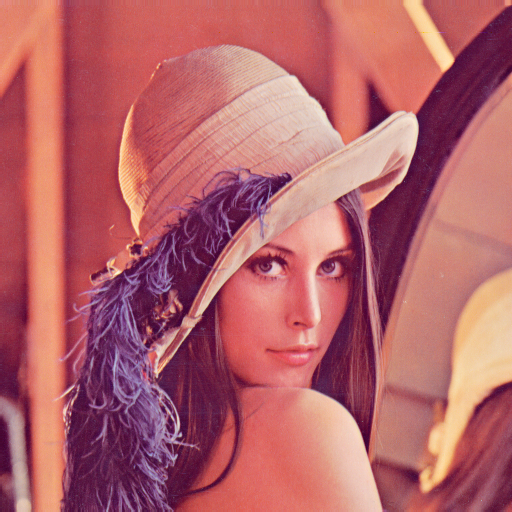

In [332]:
# read rgb of image
def read_rgb(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    return img_array

read_rgb('stego-image/lsb_only.png')

array([[[226, 136, 124],
        [226, 136, 124],
        [222, 136, 133],
        ...,
        [230, 148, 123],
        [220, 131, 111],
        [201,  99,  91]],

       [[227, 137, 124],
        [226, 136, 124],
        [222, 137, 132],
        ...,
        [230, 148, 123],
        [220, 131, 111],
        [201,  99,  90]],

       [[227, 136, 124],
        [226, 136, 125],
        [222, 136, 132],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]], dtype=uint8)
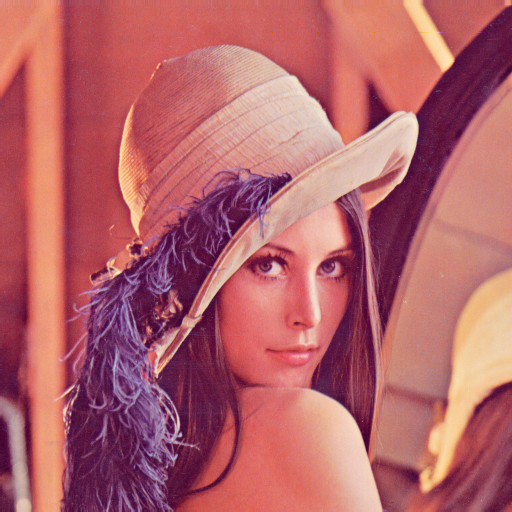

In [333]:
read_rgb('stego-image/lsb_w_ECC.png')

# Max capacity for 32% PSNR

In [334]:
capacity_test = "lorem"

In [335]:
embed_lsb("lsb_w_capacity_test.png", capacity_test)

In [336]:
extracted_data = extract_lsb("lsb_w_capacity_test.png")
extracted_data

'lorem'

In [337]:
calculate_stego_metrics("lsb_w_capacity_test.png")

Metrics between original (ori-image/lena.png) and stego image (lsb_w_capacity_test.png):
MSE: 4.1961669921875e-05
PSNR: 91.90227597661347
SSIM: 0.9999999318858996


(4.1961669921875e-05, 91.90227597661347, 0.9999999318858996)

In [341]:
# Starting with a small amount of data for embedding
capacity_test = "lorem"

# Loop variables
psnr_threshold = 32
current_psnr = 100  # Start with a very high PSNR
counter = 1

while current_psnr > psnr_threshold:
    # Generate new data to embed (increase data size)
    capacity_test = capacity_test * 2

    # Embed data into the image
    embed_lsb("lsb_w_capacity_test.png", capacity_test)

    extracted_data = extract_lsb("lsb_w_capacity_test.png")

    # Calculate the stego metrics (without calling the PSNR as a function)
    _, current_psnr, _ = calculate_stego_metrics("lsb_w_capacity_test.png")

    # Ensure current_psnr is not treated as a function
    print(f"Iteration {counter}: PSNR = {current_psnr}")
    print(f"Data length {len(extracted_data)}")

    # Increment the counter to track iterations
    counter += 1

# After the loop finishes
print("Final embedding data:", capacity_test)
print("Final PSNR:", current_psnr)

Metrics between original (ori-image/lena.png) and stego image (lsb_w_capacity_test.png):
MSE: 6.866455078125e-05
PSNR: 89.76347777716265
SSIM: 0.9999998995254152
Iteration 1: PSNR = 89.76347777716265
Data length 10
Metrics between original (ori-image/lena.png) and stego image (lsb_w_capacity_test.png):
MSE: 0.00011444091796875
PSNR: 87.54499028099909
SSIM: 0.9999998533603575
Iteration 2: PSNR = 87.54499028099909
Data length 20
Metrics between original (ori-image/lena.png) and stego image (lsb_w_capacity_test.png):
MSE: 0.00022379557291666666
PSNR: 84.63228869725084
SSIM: 0.9999997572538135
Iteration 3: PSNR = 84.63228869725084
Data length 40
Metrics between original (ori-image/lena.png) and stego image (lsb_w_capacity_test.png):
MSE: 0.0004183451334635417
PSNR: 81.91545639589259
SSIM: 0.9999994592911163
Iteration 4: PSNR = 81.91545639589259
Data length 80
Metrics between original (ori-image/lena.png) and stego image (lsb_w_capacity_test.png):
MSE: 0.0008252461751302084
PSNR: 78.9649684

SteganographyException: binary value larger than the expected size

In [385]:
512 * 512

262144

In [366]:
786432 - 10000

686432

In [398]:
full_data = "b" * 251144

In [399]:
embed_lsb("lsb_w_capacity_test_full.png", full_data)

SteganographyException: binary value larger than the expected size 18 > 16